In [1]:
import sys  
import os  
  
# Add the 'data' directory to sys.path  
sys.path.insert(0, 'data')  
from relative import * 

sys.path.insert(0, '..')
from AT_funs import *

In [2]:
filename = 'data/A2A.MI.xlsx'
df = read_xlsx(filename)
ticker = filename.replace('xlsx', '')

filename_bm = 'data/FTSEMIB.MI.xlsx'
bm_df = read_xlsx(filename_bm)
bm_name = filename_bm.replace('xlsx', '')

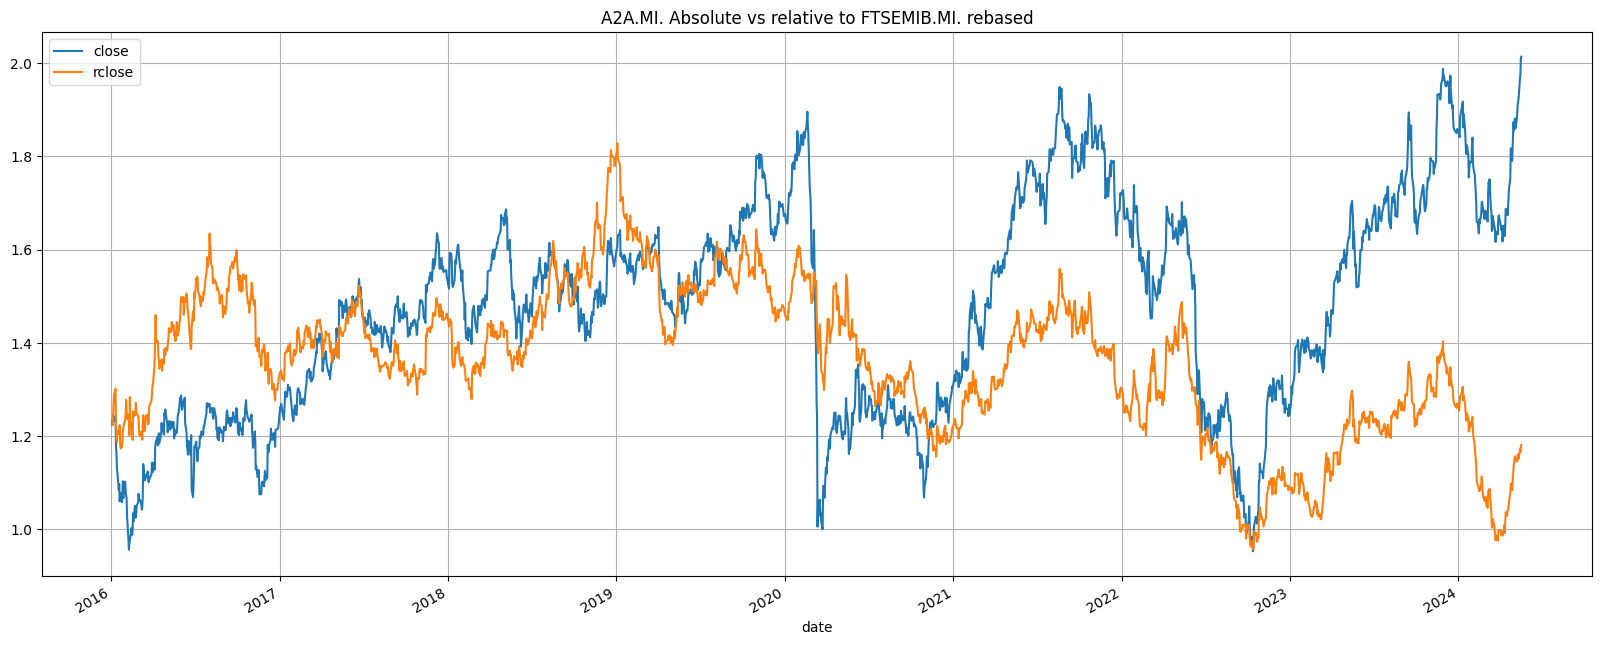

In [3]:
plot_abs_rel(df, ticker, bm_df, bm_name)

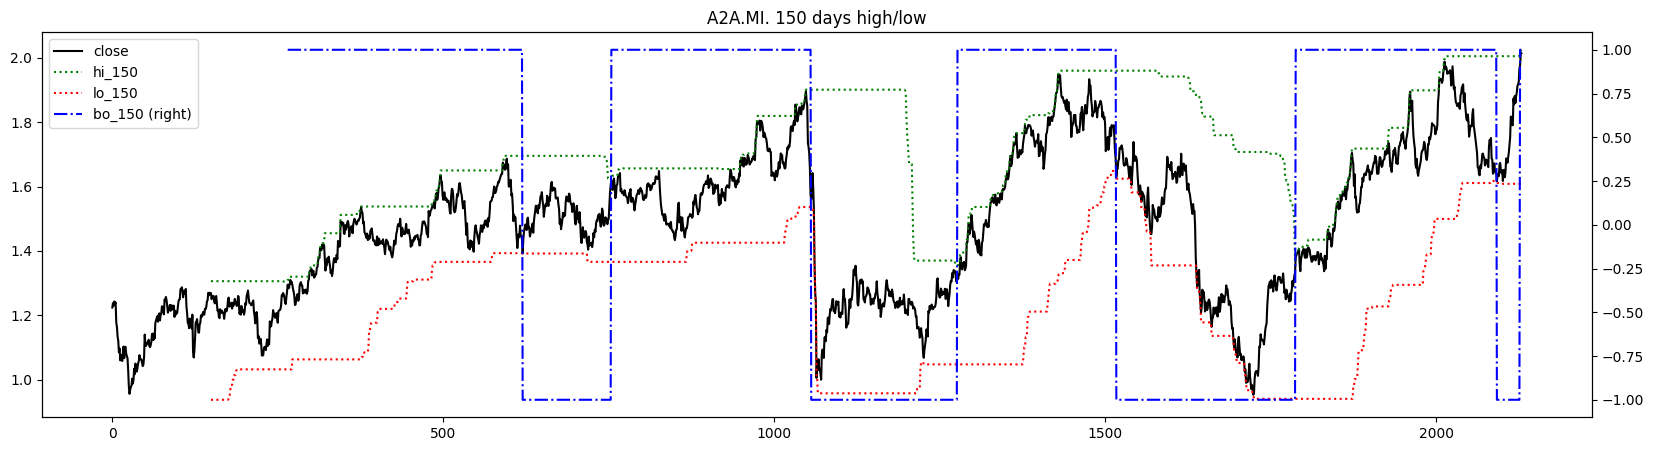

In [5]:
window_bo = 150
df_bo = df.copy()
df_bo = signal_bo(df_bo, window_bo)
bo_signal = 'bo_' + str(window_bo)
plot_signal_bo(df_bo, window_bo, ticker)

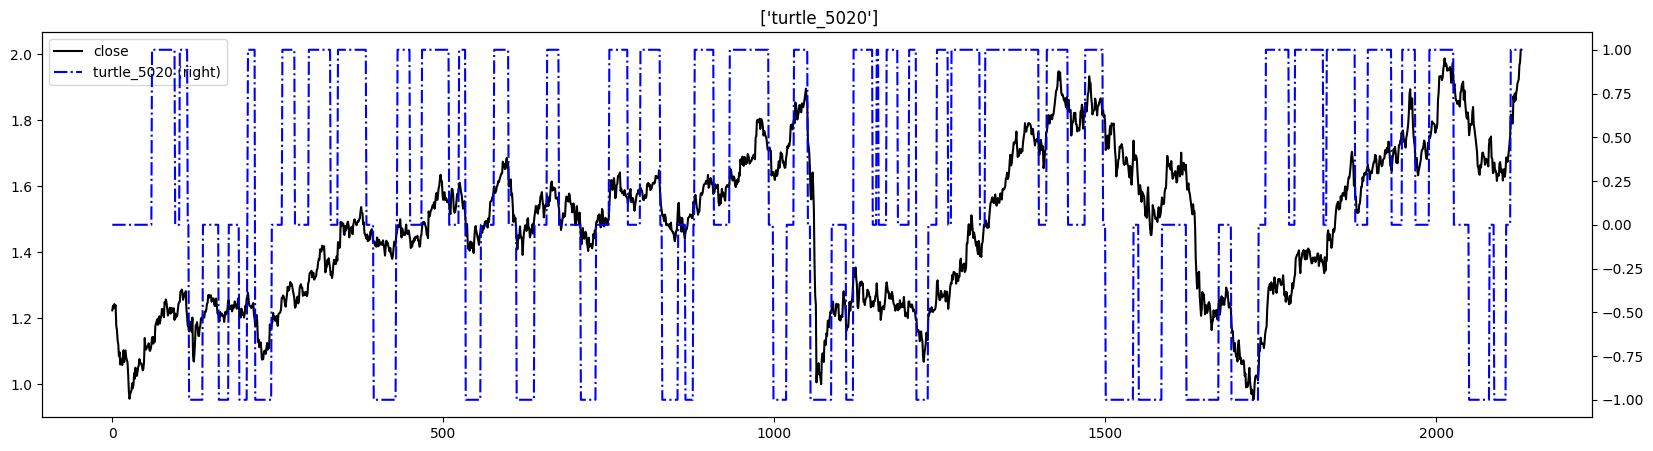

In [5]:
fast = 20
slow = 50
df_tt = df.copy()
df_tt = signal_tt(df_tt, fast = fast, slow = slow)
tt_signal = 'turtle_' + str(slow) + str(fast)
plot_signal_tt(df_tt, fast, slow)

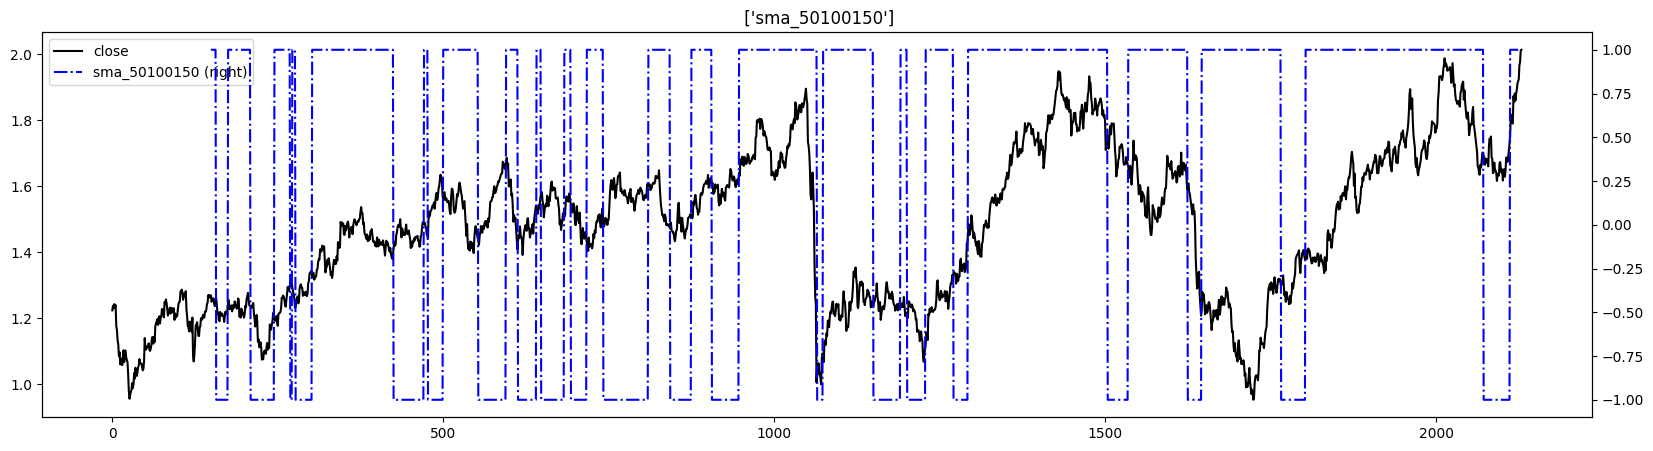

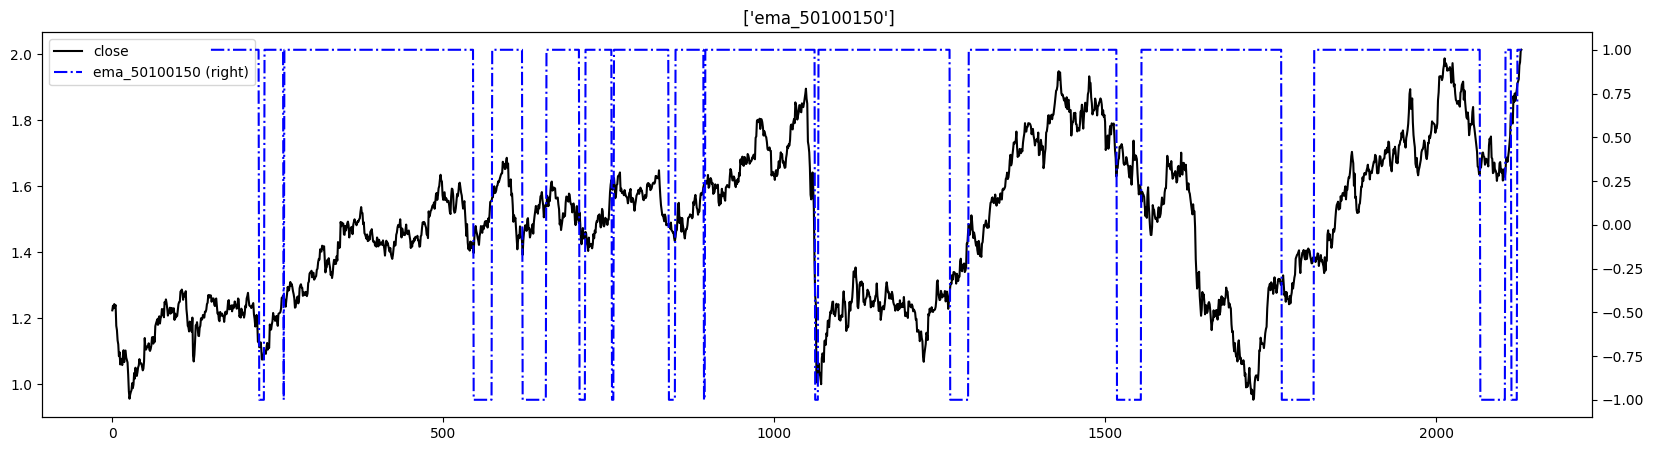

In [6]:
st = 50
mt = 100
lt = 150
df_ma = df.copy()
df_ma = signal_sma(df_ma, st, mt, lt)
df_ma = signal_ema(df_ma, st, mt, lt)

sma_signal = 'sma_' + str(st) + str(mt) + str(lt)
ema_signal = 'ema_' + str(st) + str(mt) + str(lt)

plot_signal_ma(df_ma, st, mt, lt)

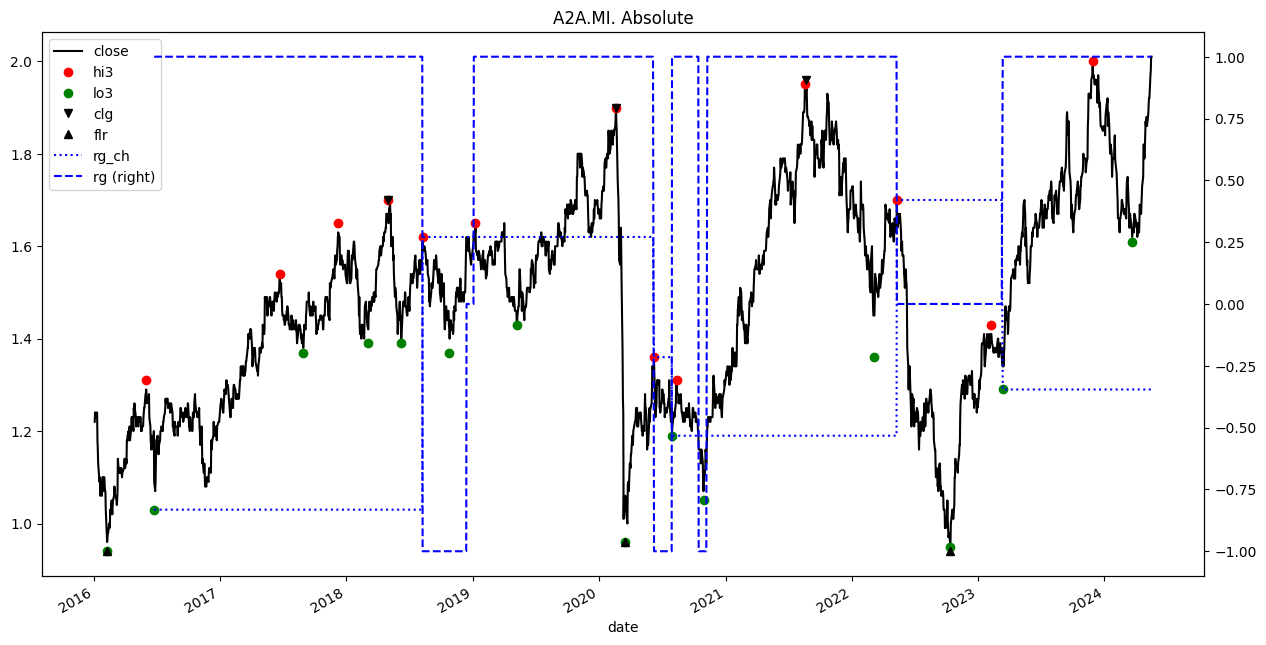

In [7]:
df_fc = df.copy()
df_fc = detect_regime(df_fc, bm_df)
fc_signal = 'rg'
fcr_signal = 'rrg'
plot_signal_abs(df_fc, ticker)

1
1


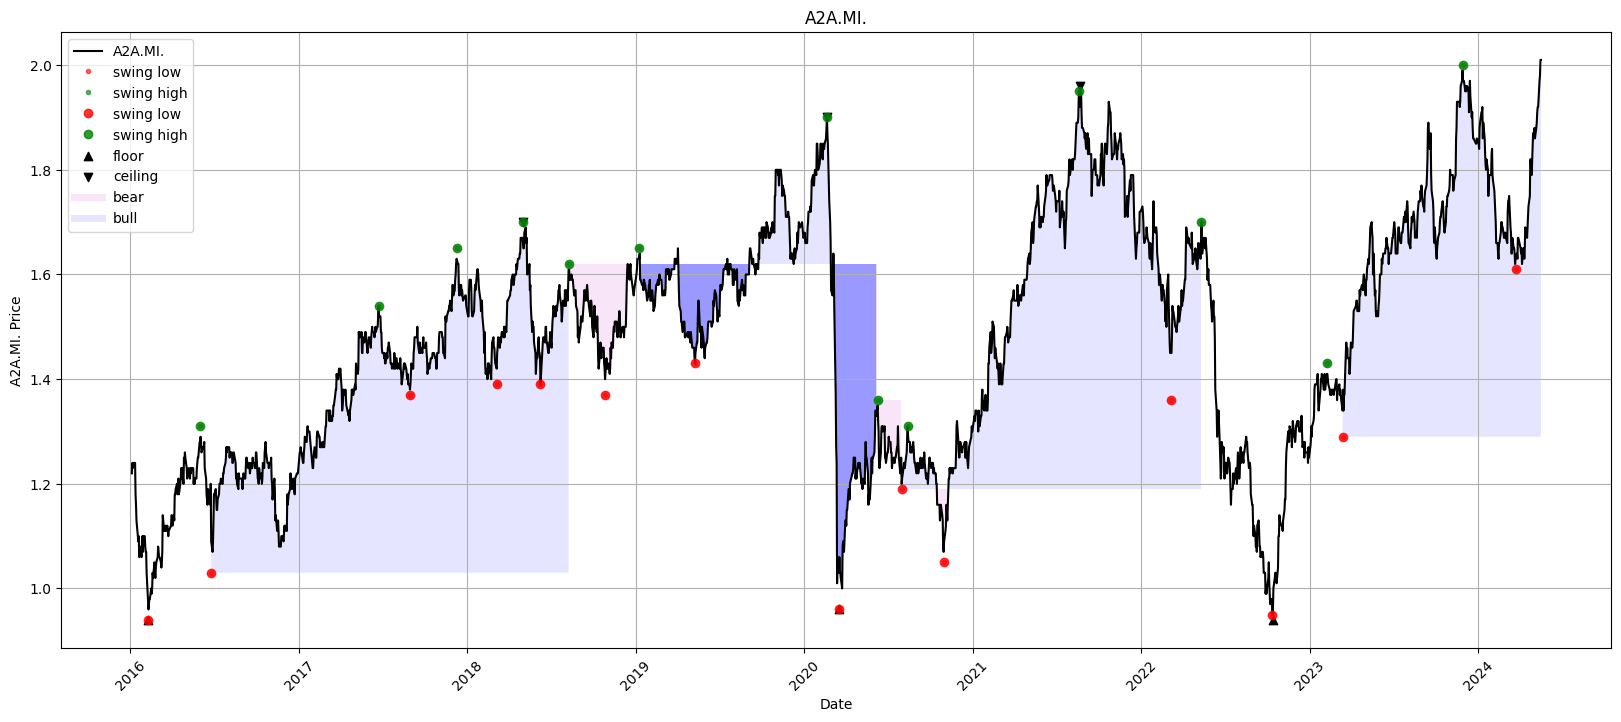

In [8]:
plot_regime_abs(df_fc, ticker)

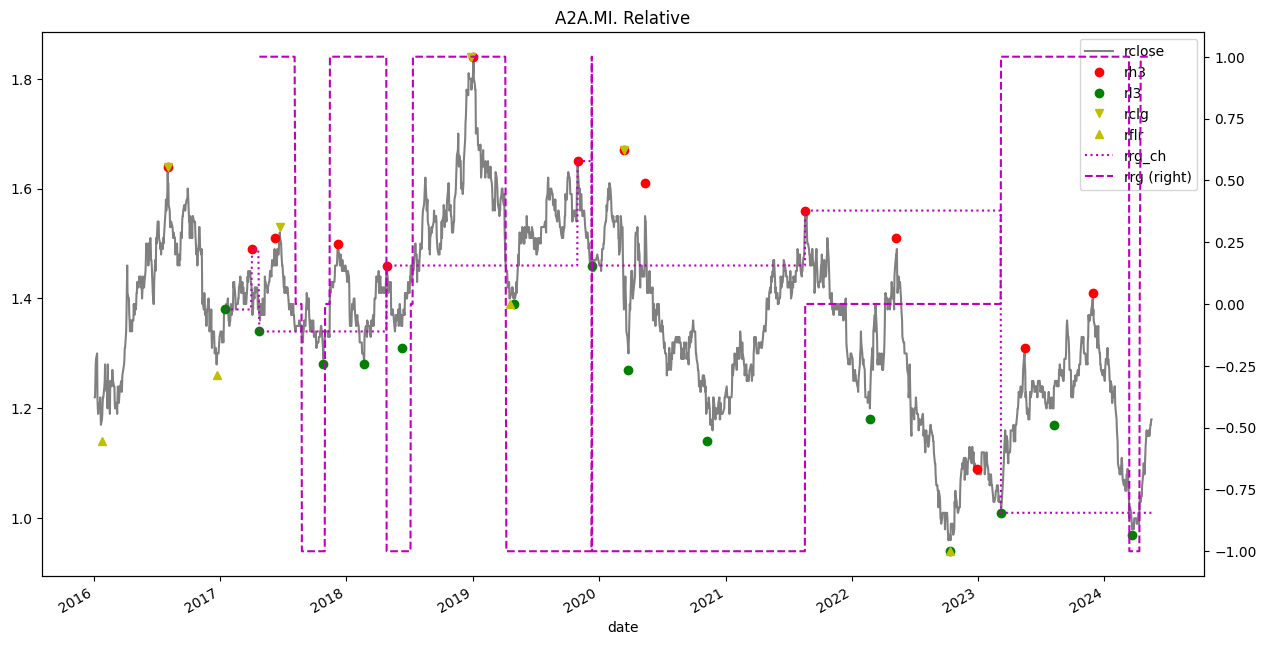

In [9]:
plot_signal_rel(df_fc, ticker)

1
1


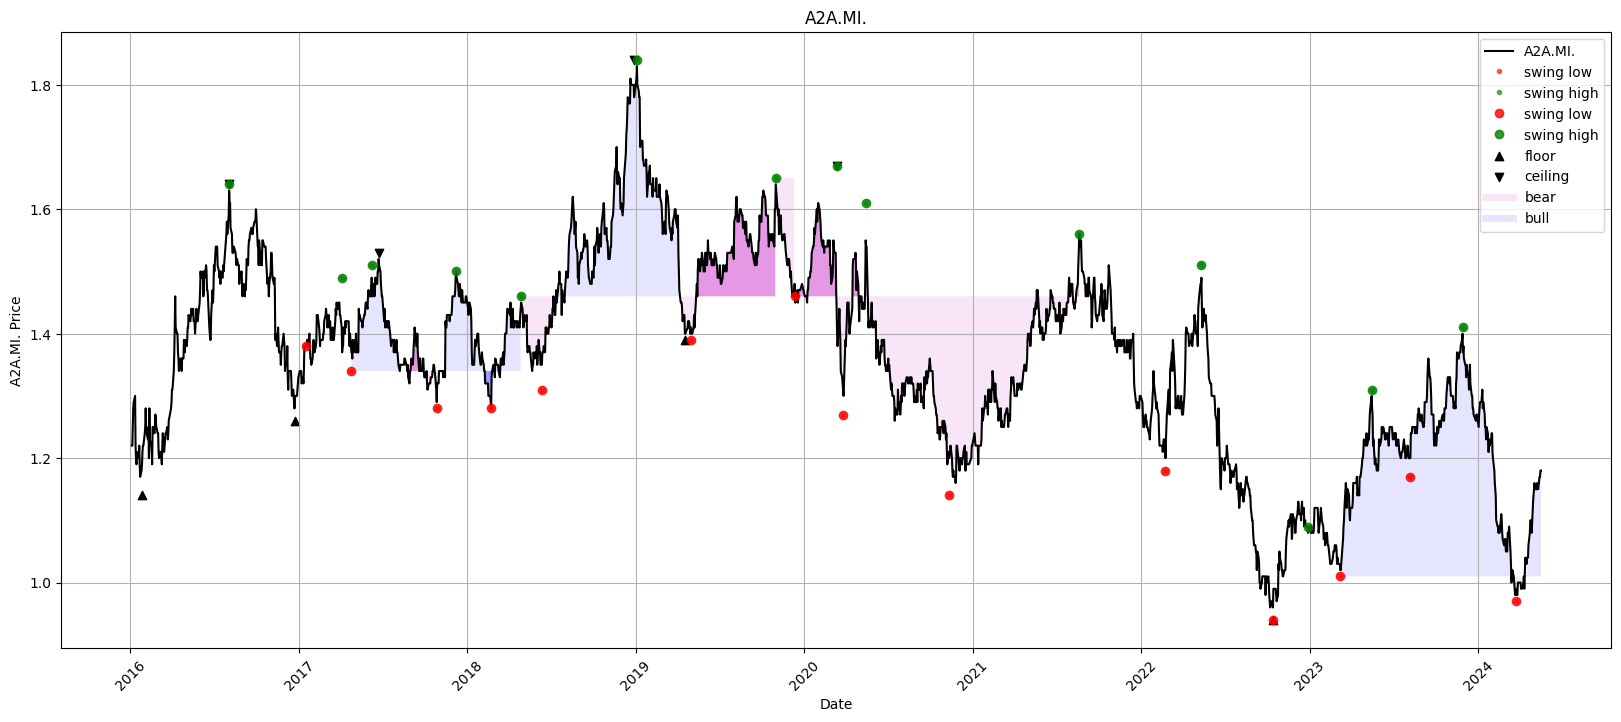

In [10]:
plot_regime_rel(df_fc, ticker)

In [11]:
method = ['breakout', 'turtle', 'sma', 'ema', 'floor_ceiling', 'floor_ceiling_relative']
signal = [bo_signal, tt_signal, sma_signal, ema_signal, fc_signal, fcr_signal]
df_signal = [df_bo, df_tt, df_ma, df_ma, df_fc, df_fc]

# method = ['turtle']
# signal = [tt_signal]
# df_signal = [df_tt]

In [12]:
def get_df_signal(df_signal, signal, window_exp):
    df_signal = df_signal.copy()
    df_signal = get_returns(df_signal, signal)
    df_signal = get_expectancies(df_signal, window_exp)
    return df_signal
    

In [13]:
window_exp = 100  # set the value of window_exp  
output_signals = []  # create an empty list to hold the output dataframes  
  
for i in range(len(signal)):  
    df = df_signal[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_df_signal(df, s, window_exp)  # call the function on the ith dataframe and signal  
    output_df['method'] = str(m)  # create a new column in output_df with the signal name  
    output_signals.append(output_df)  # append the output dataframe to the list  
  
# output_signals now contains the processed dataframes with the signal column added  


In [14]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'close', 'stop_loss','tt_cumul']]
output_df_sel.groupby('method').last() 

close  stop_loss  tt_cumul
method                                            
breakout                2.014      1.685 -0.188995
ema                     2.014      1.685  0.172583
floor_ceiling           2.010      1.680  1.671241
floor_ceiling_relative  2.010      1.680  0.226351
sma                     2.014      1.685  0.079520
turtle                  2.014      1.685  0.212740

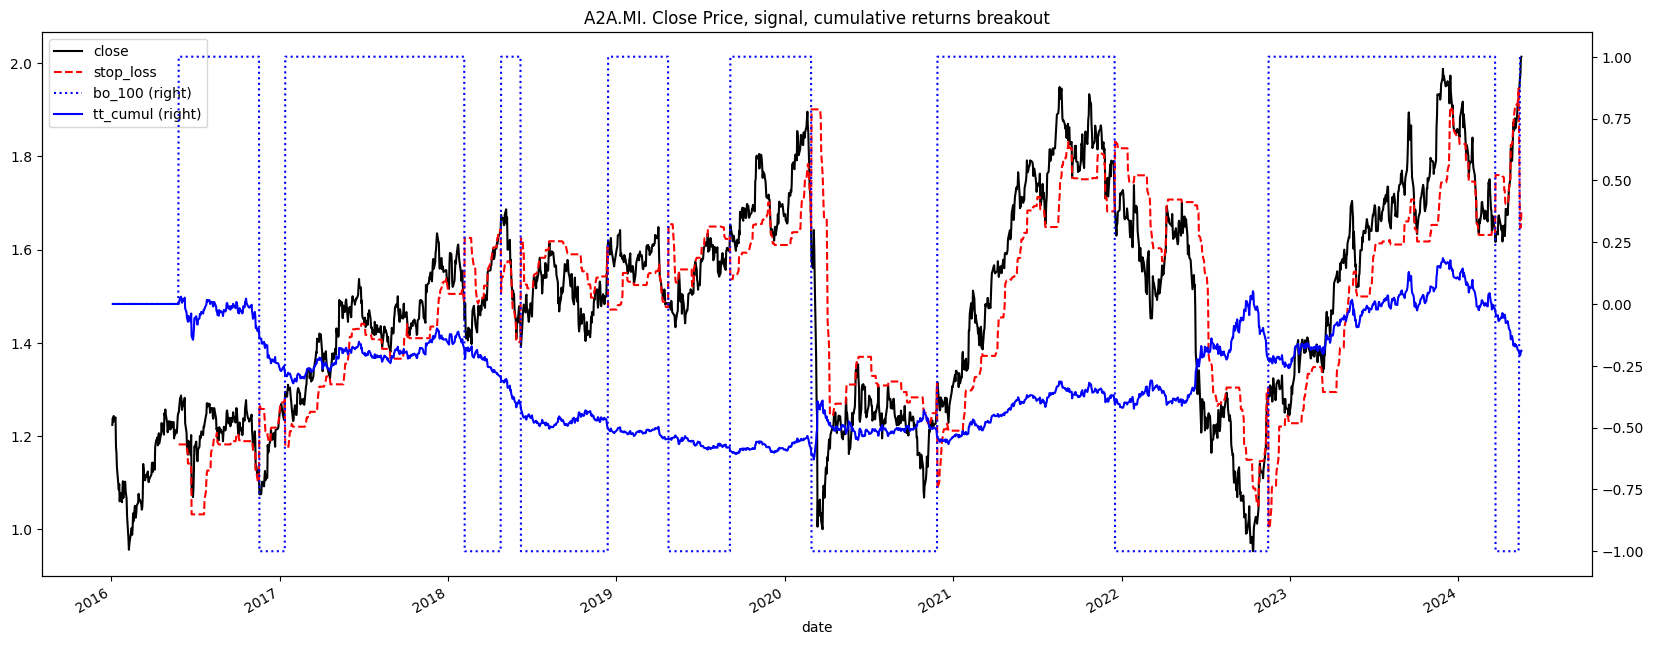

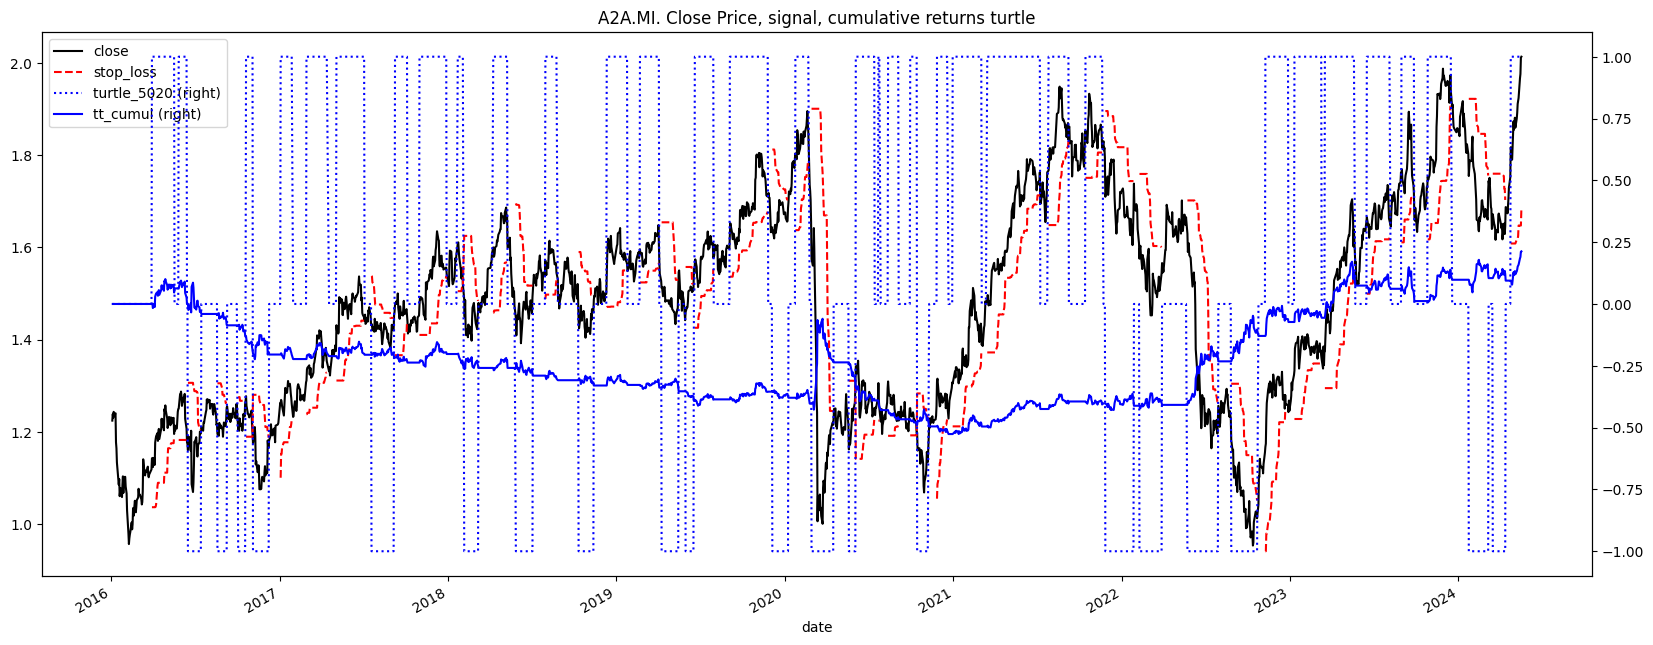

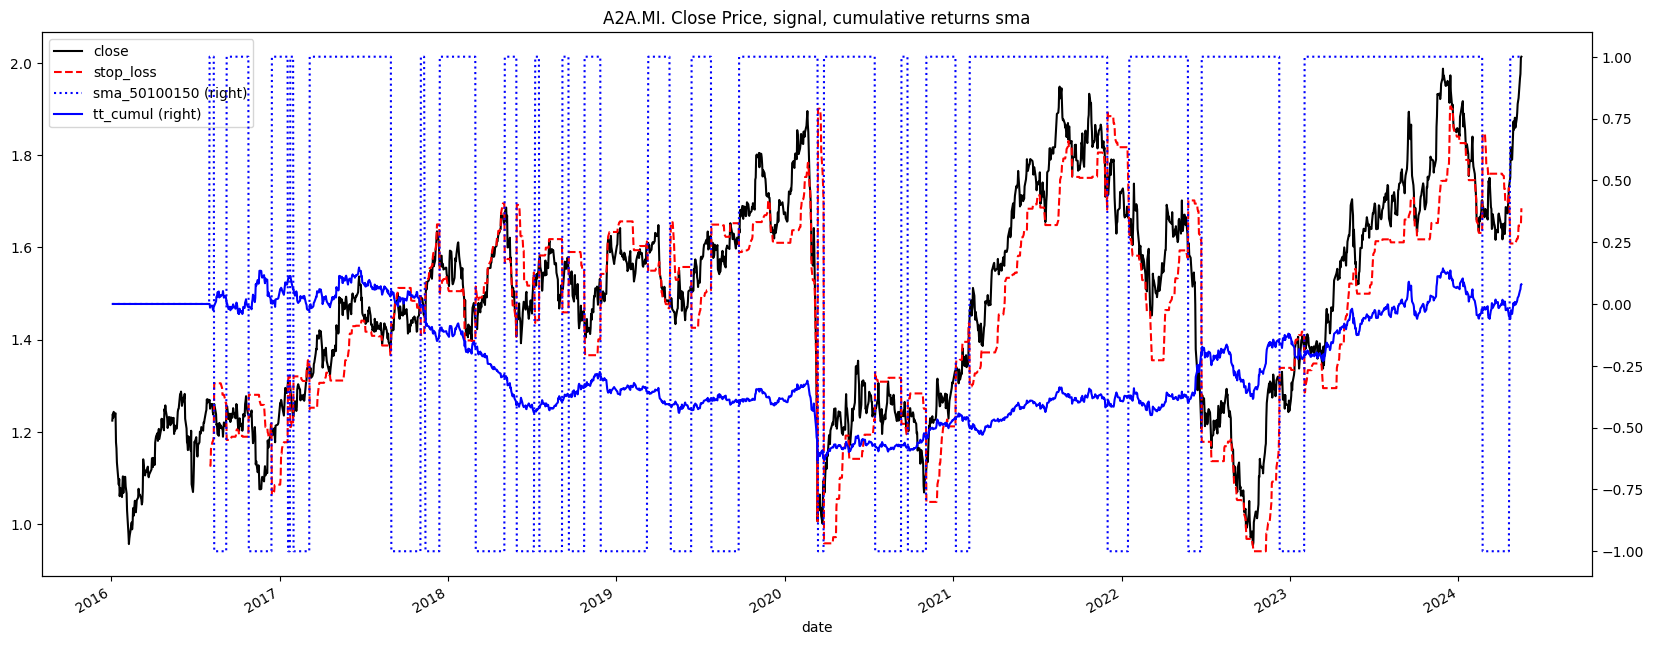

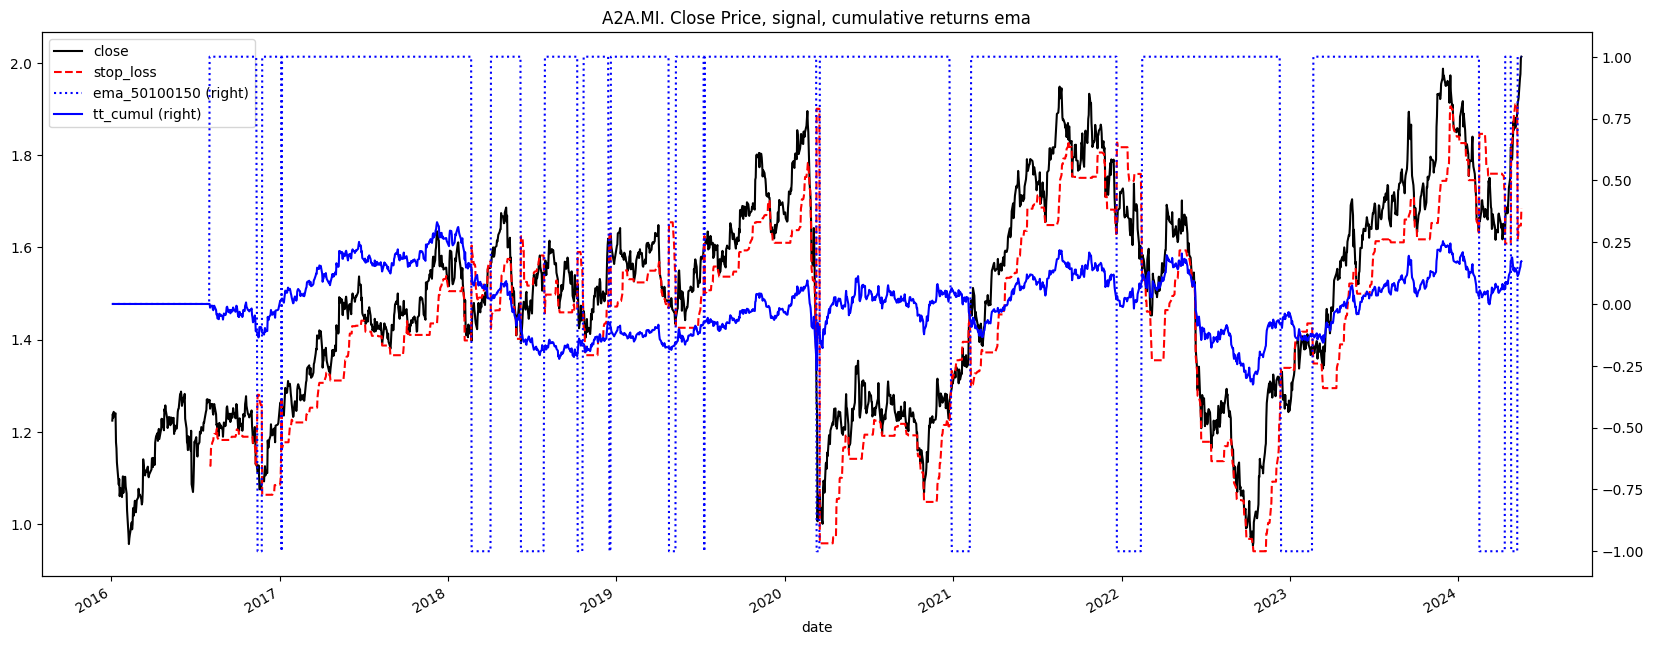

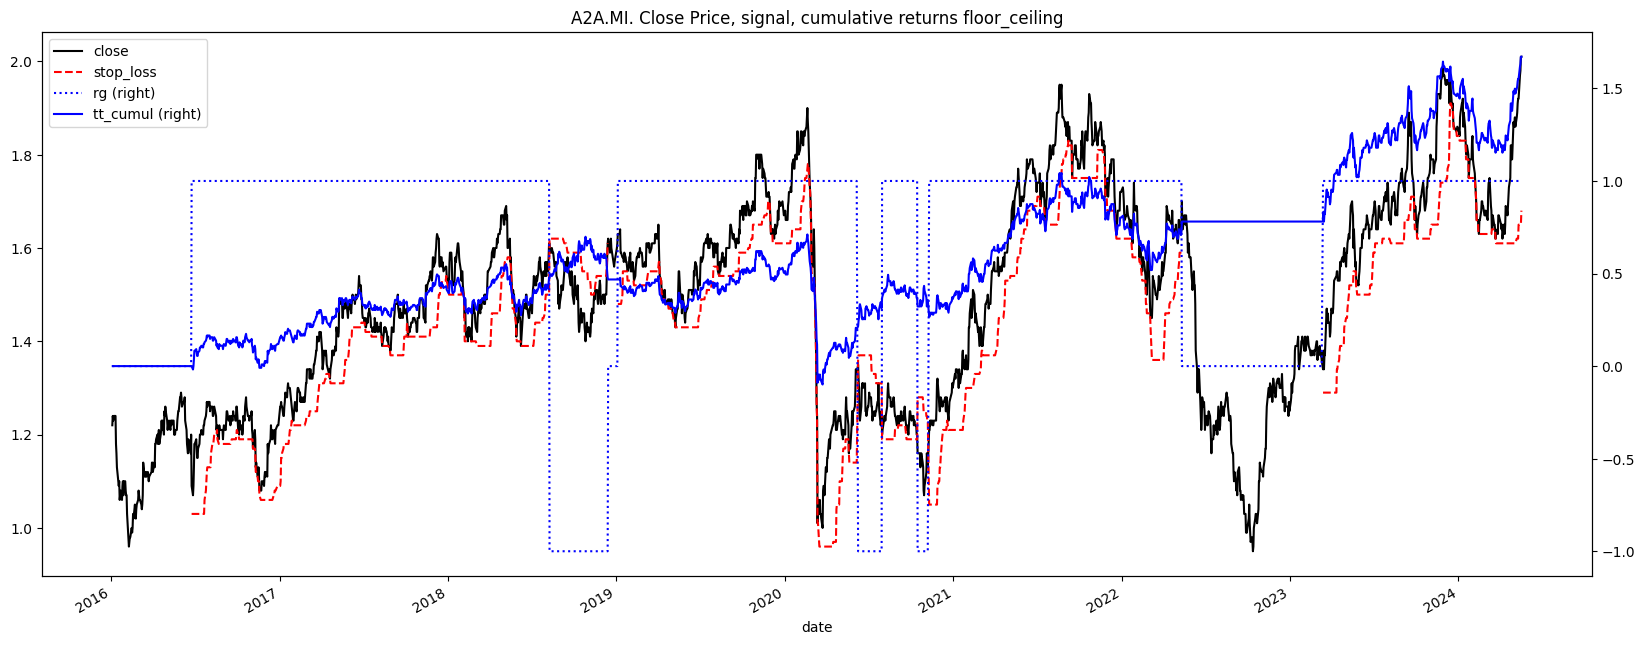

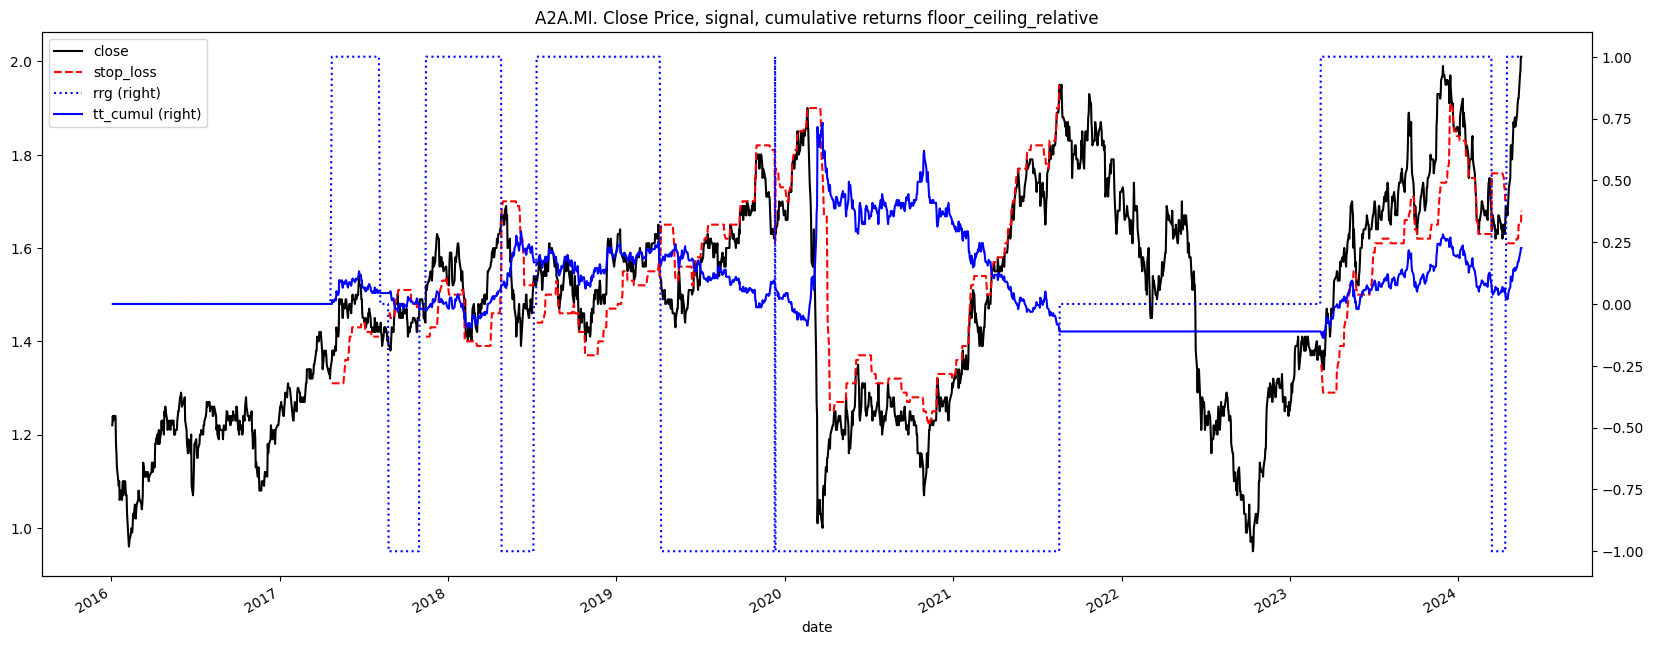

In [15]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_price_signal_cumreturns(df, ticker, s, m)

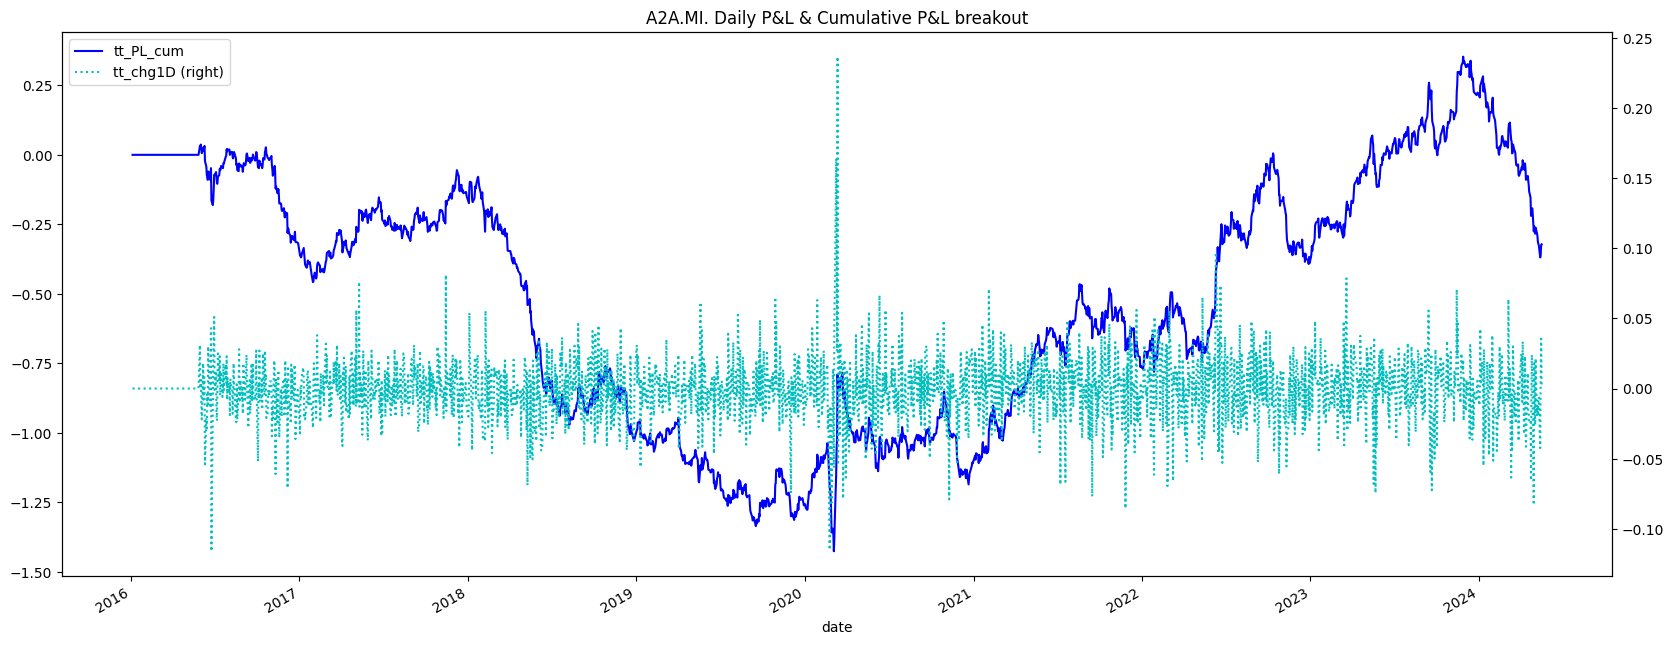

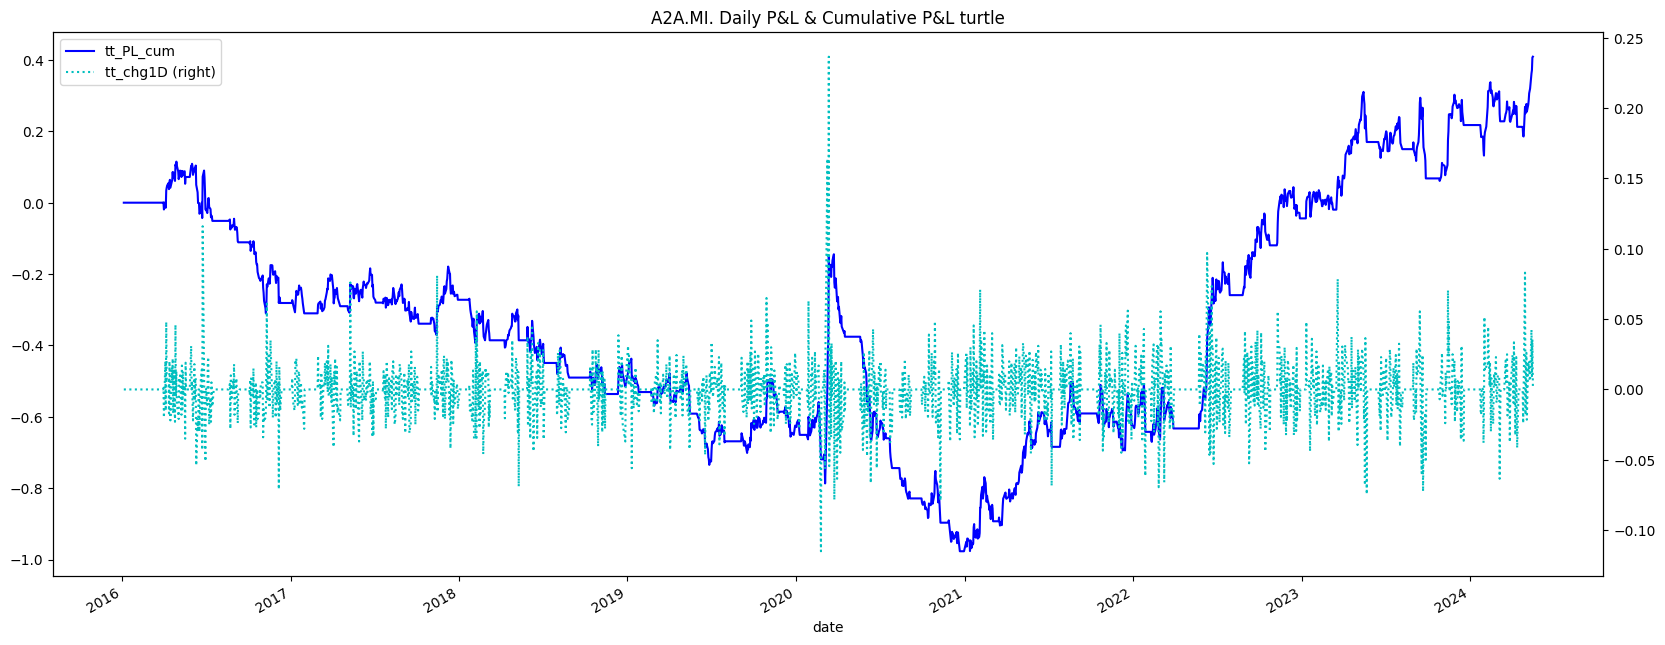

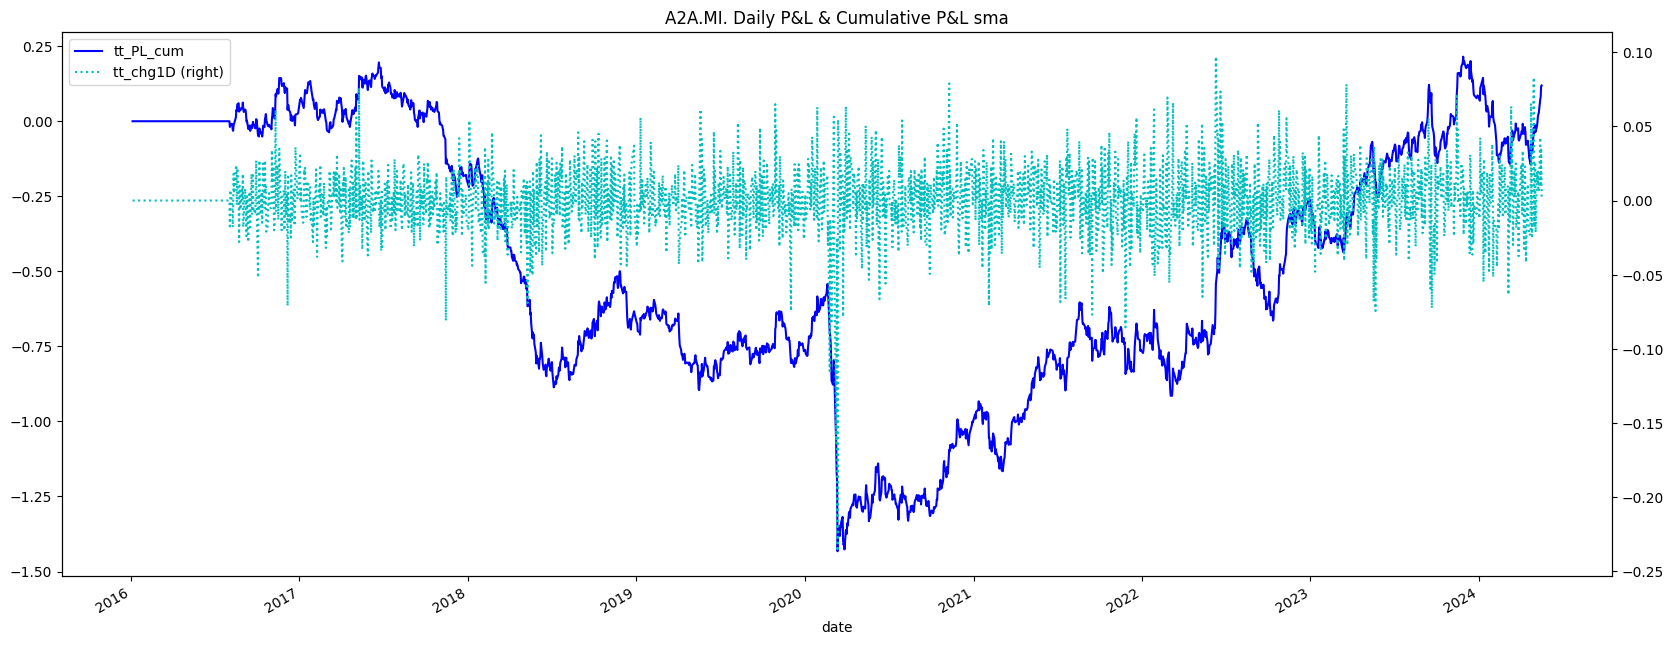

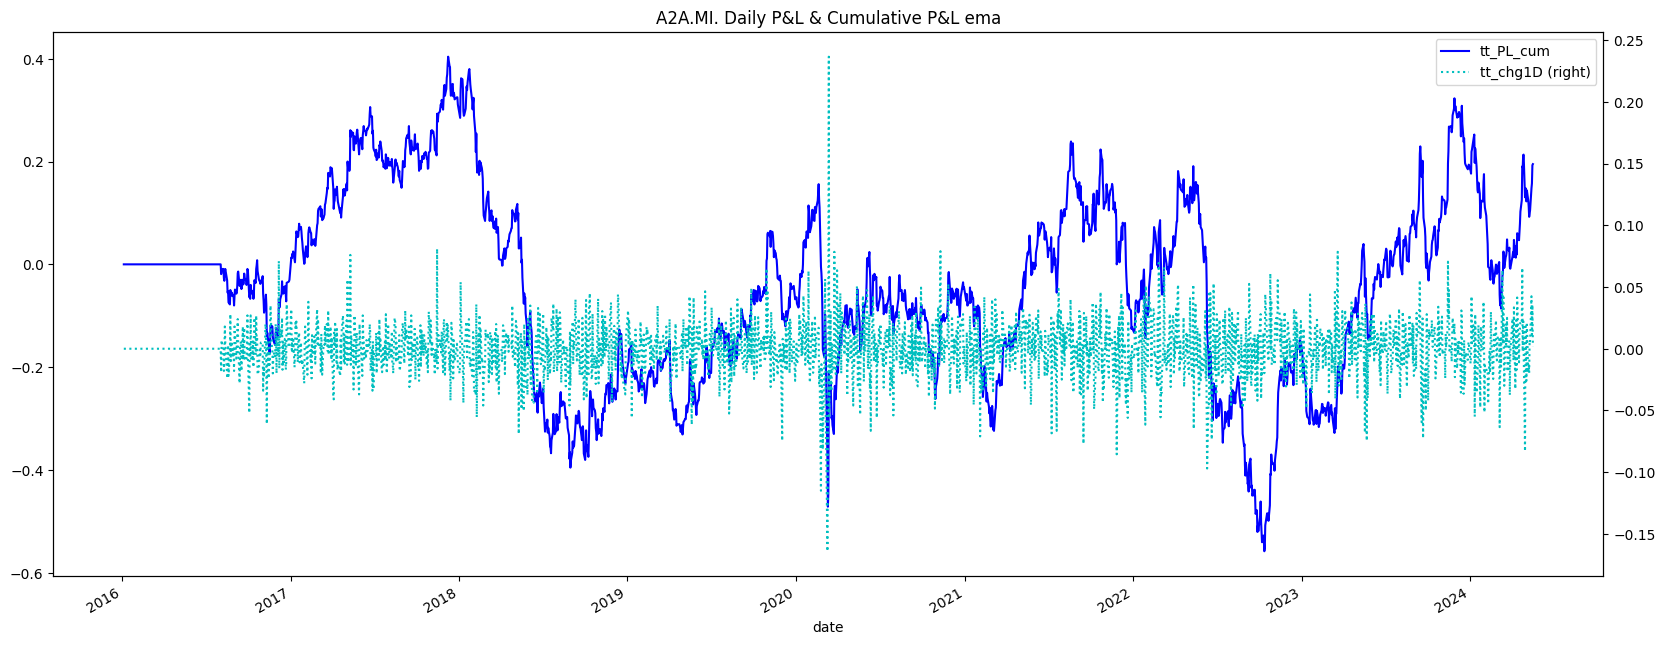

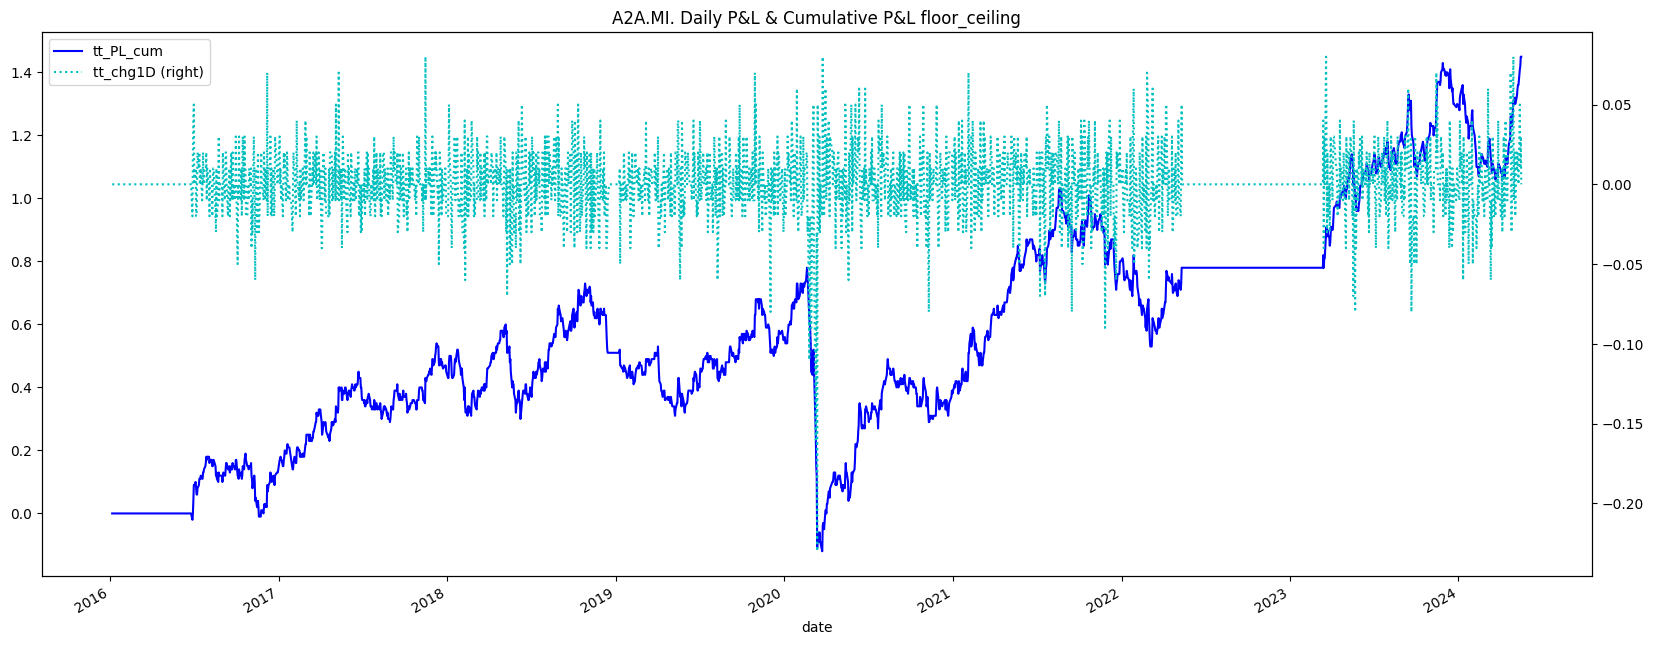

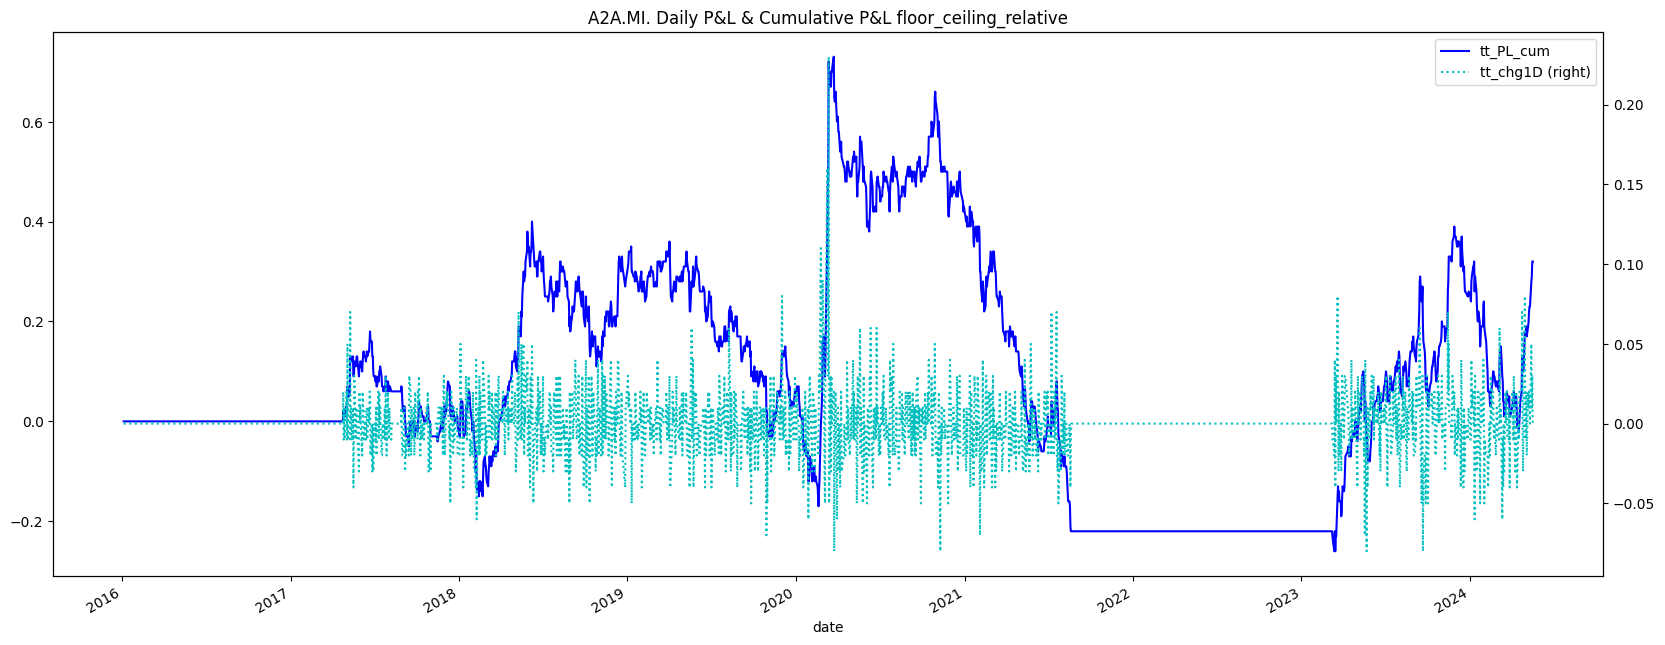

In [16]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_PL(df, ticker, m)

In [17]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'trading_edge','geometric_expectancy','kelly']]
output_df_sel.groupby('method').last() 

trading_edge  geometric_expectancy       kelly
method                                                                
breakout                   -0.002700             -0.002714 -101.981579
ema                         0.000049              0.000034    1.683405
floor_ceiling               0.001386              0.001373   50.340082
floor_ceiling_relative      0.001214              0.001201   44.419252
sma                        -0.000013             -0.000027   -0.439285
turtle                      0.002130              0.002125  188.146183

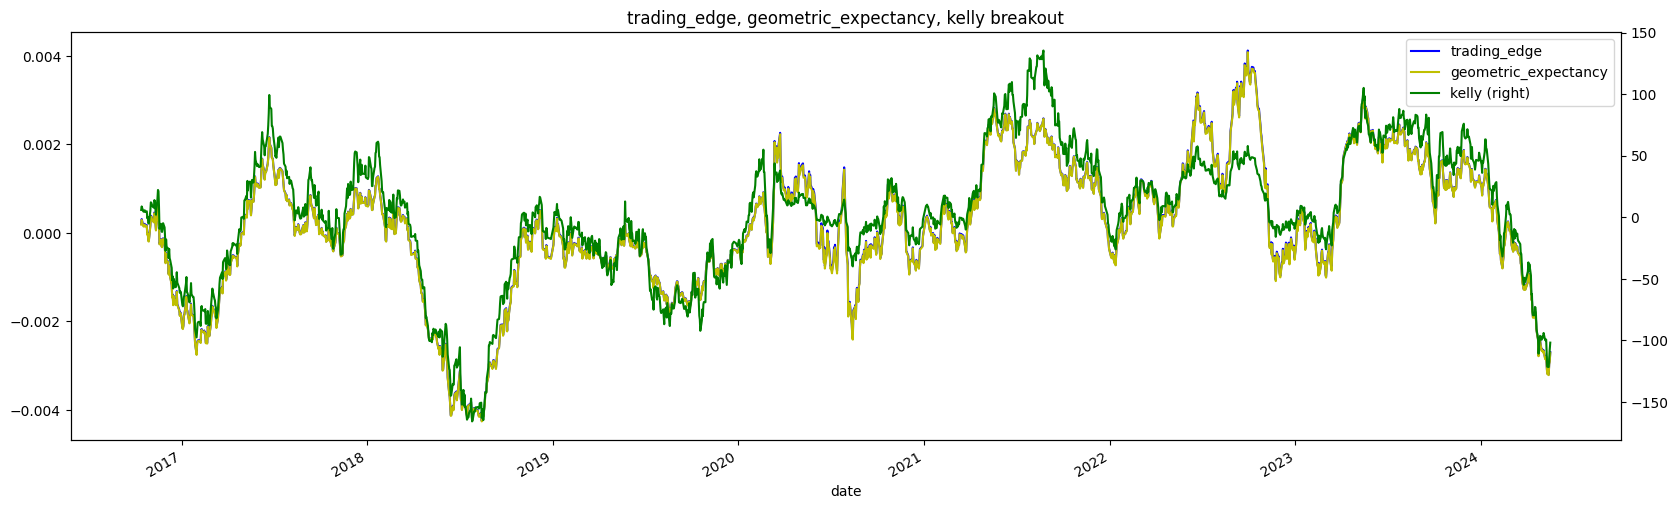

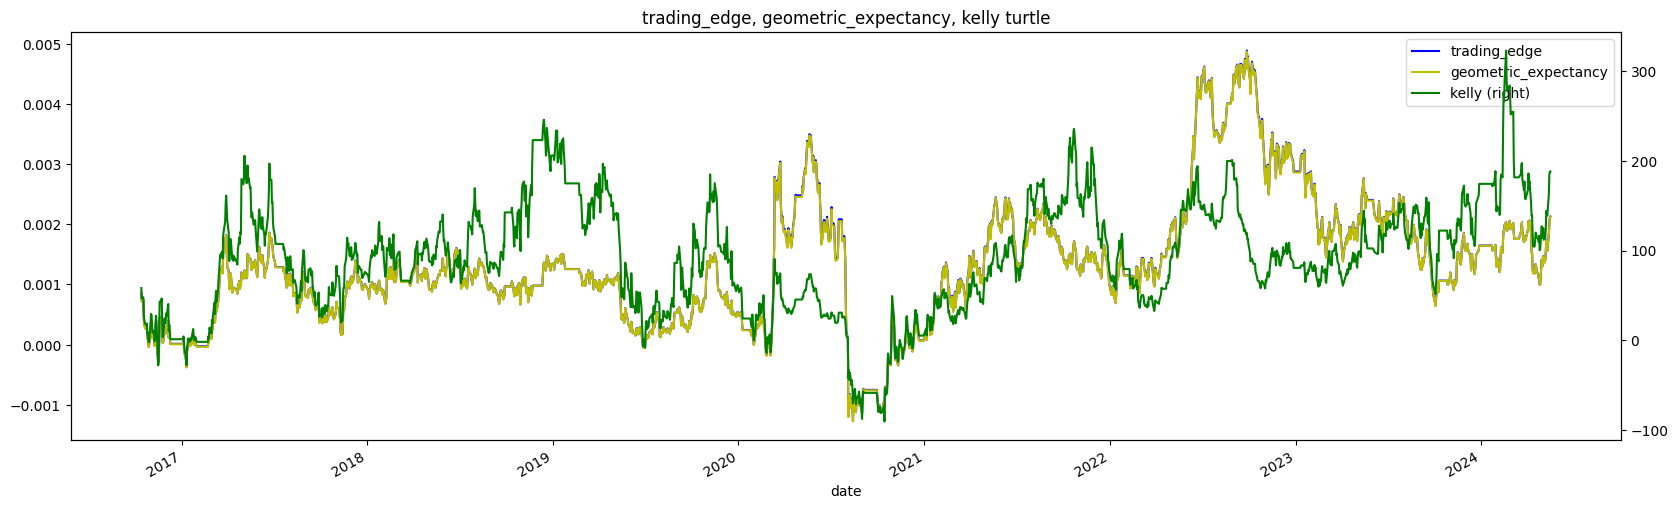

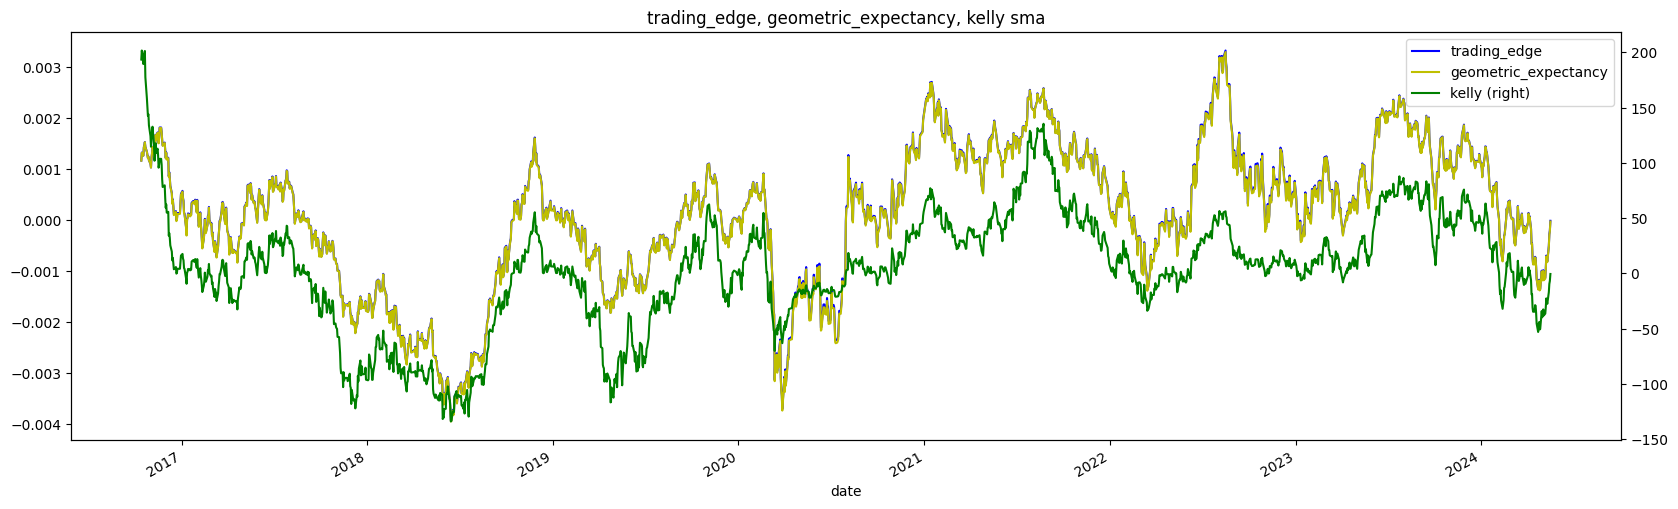

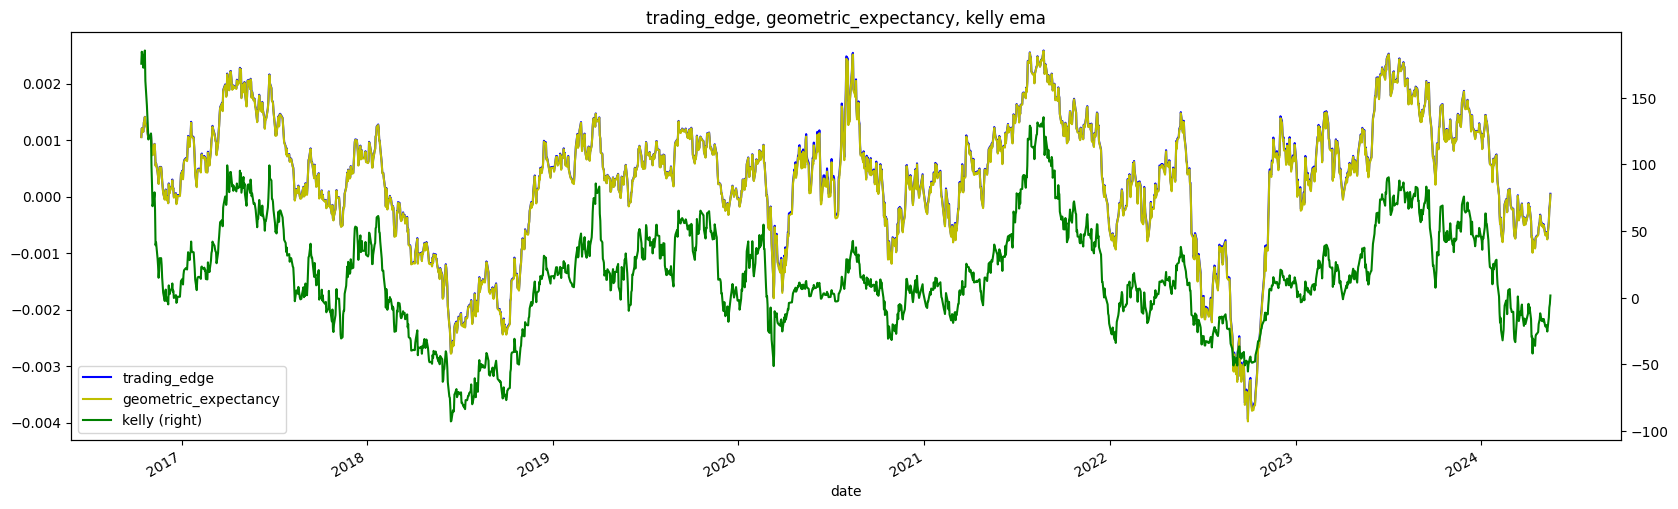

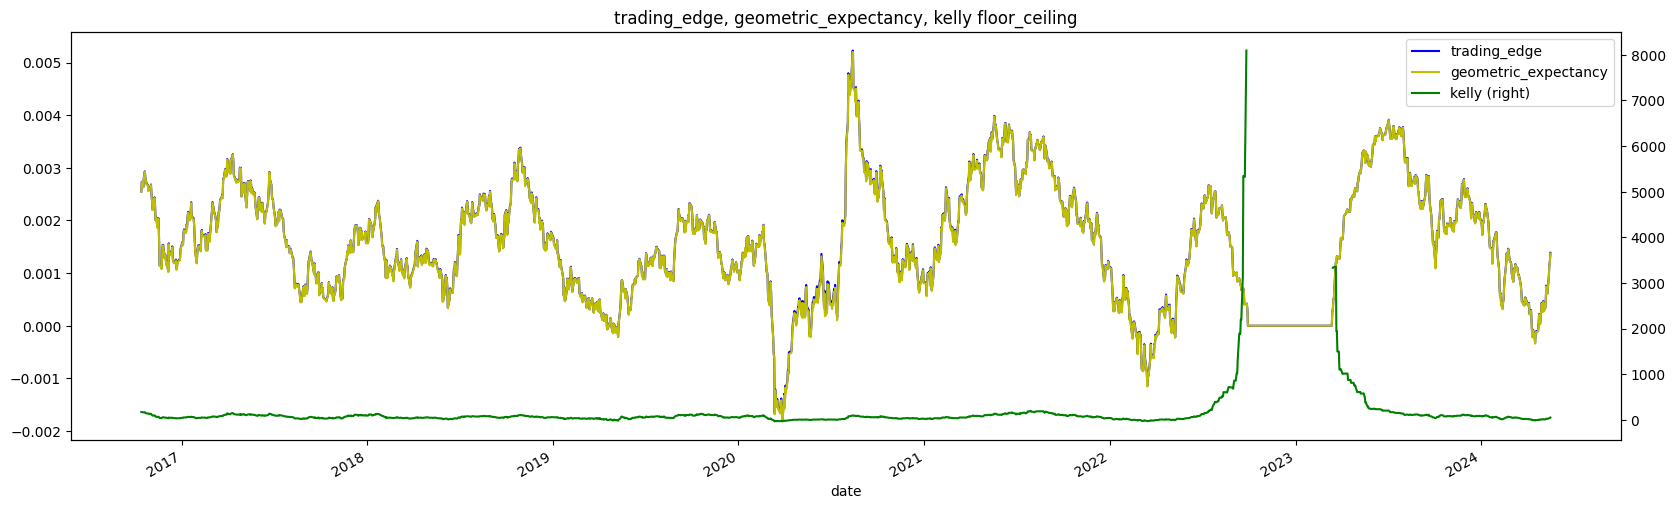

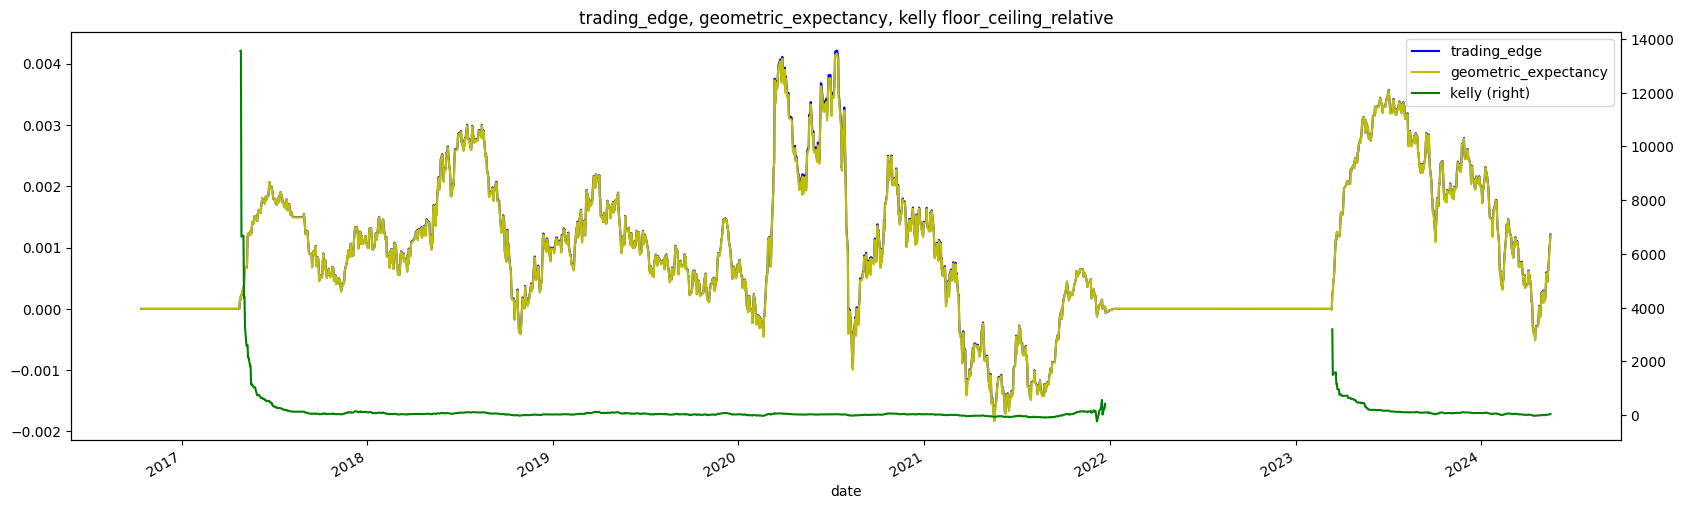

In [18]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_expectancies(df, window_exp, m)

In [19]:
starting_capital = 100000
lot = 100
mn = -0.0025
mx = -0.0075
# avg = (mn + mx) / 2
tolerance= -0.1
equal_weight = 0.05
span= 5
fx = 1

In [20]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_equity_risk(df, tolerance, mn, mx, span)  # call the function on the ith dataframe and signal  
    output_signals.append(output_df)  # append the output dataframe to the list  


In [21]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_shares(df, starting_capital, lot, mn, mx, tolerance, equal_weight, span, fx, s)
    output_signals.append(output_df)  # append the output dataframe to the list  


In [24]:
pd.concat(output_signals, axis=0)[['constant_risk', 'convex_risk', 'concave_risk']]

constant_risk  convex_risk  concave_risk
date                                                         
2016-01-04 08:00:00       0.006120     0.009180      0.009180
2016-01-05 08:00:00       0.006190     0.009285      0.009285
2016-01-06 08:00:00       0.006150     0.008734      0.009221
2016-01-07 08:00:00       0.006215     0.008995      0.009285
2016-01-08 08:00:00       0.006175     0.008680      0.009248
...                            ...          ...           ...
2024-05-10 07:00:00       0.009600     0.006803      0.013218
2024-05-13 07:00:00       0.009850     0.008087      0.013720
2024-05-14 07:00:00       0.009900     0.009502      0.014091
2024-05-15 07:00:00       0.010050     0.011112      0.014530
2024-05-16 08:43:11       0.010050     0.012288      0.014719

[38340 rows x 3 columns]

In [22]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'constant','concave','convex','equal_weight', 'tt_PL_cum_fx']]
output_df_sel.groupby('method').last() 

constant        concave         convex  \
method                                                                
breakout                 97649.399805   96457.999706   96457.999706   
ema                     100662.997341  101013.995934  101013.995934   
floor_ceiling           112186.000000  118099.000000  114826.000000   
floor_ceiling_relative  106061.000000  107257.000000  103781.000000   
sma                     100404.597425  100618.796062  100618.796062   
turtle                  100487.248266  100350.247467   98956.348026   

                         equal_weight  tt_PL_cum_fx  
method                                               
breakout                 98711.999893     -0.322000  
ema                     100760.496950      0.194999  
floor_ceiling           105678.000000      1.450000  
floor_ceiling_relative  100976.000000      0.320000  
sma                     100464.097047      0.118999  
turtle                  100673.898160      0.409000

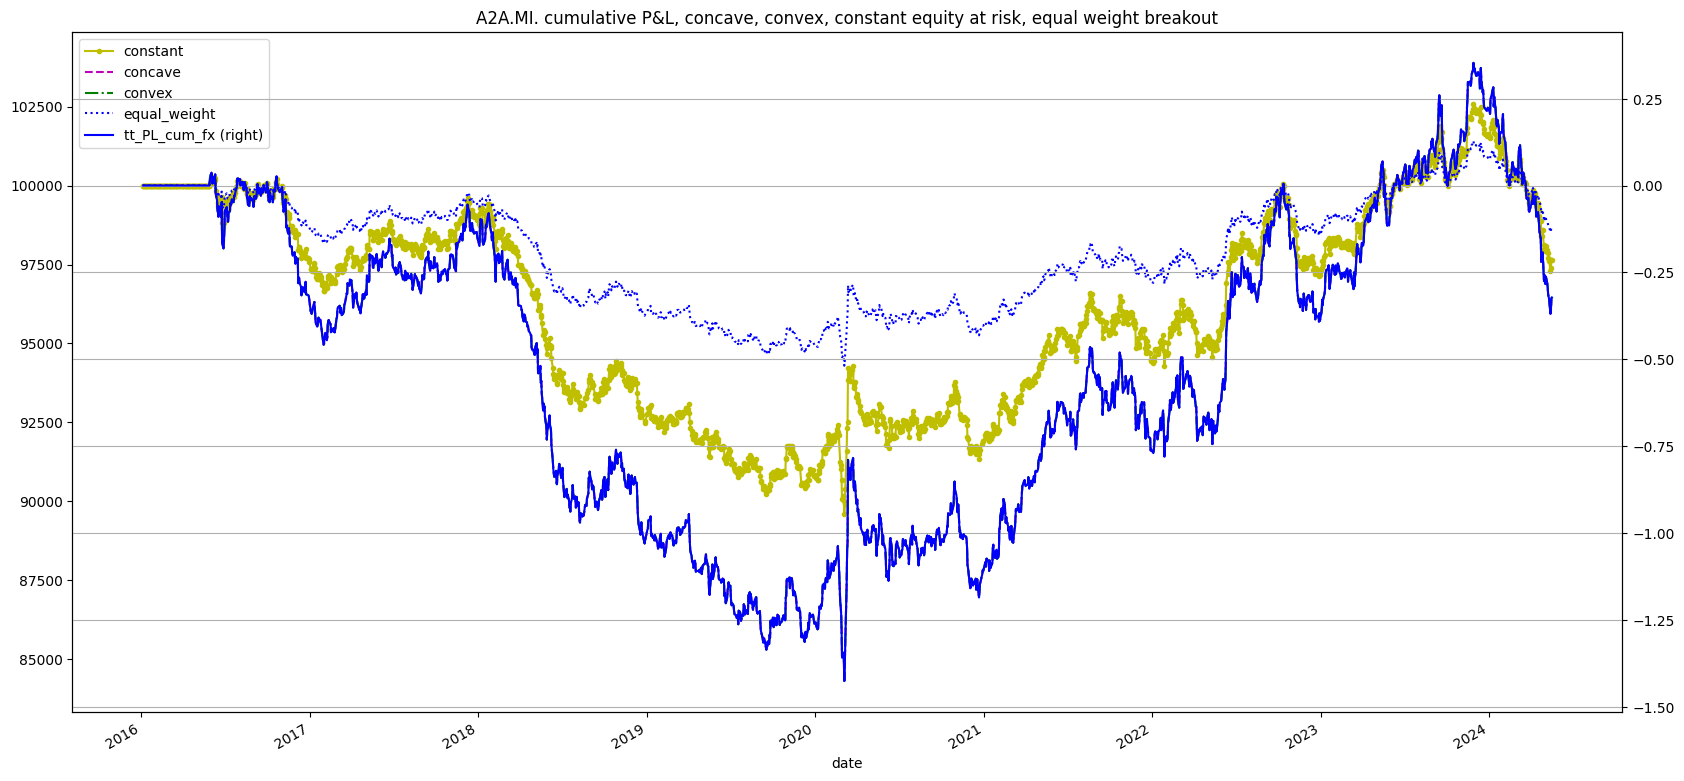

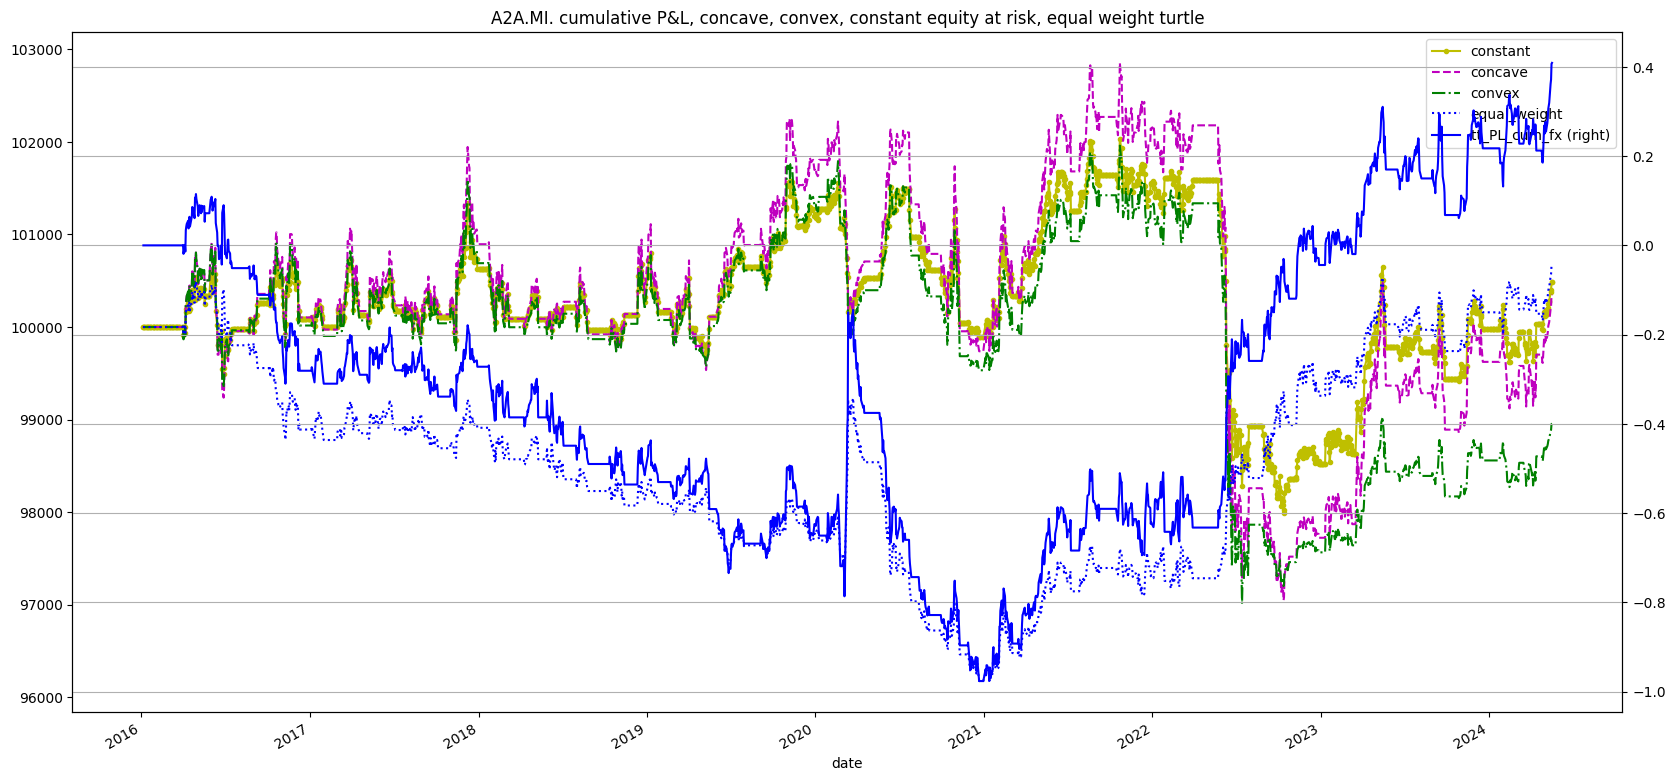

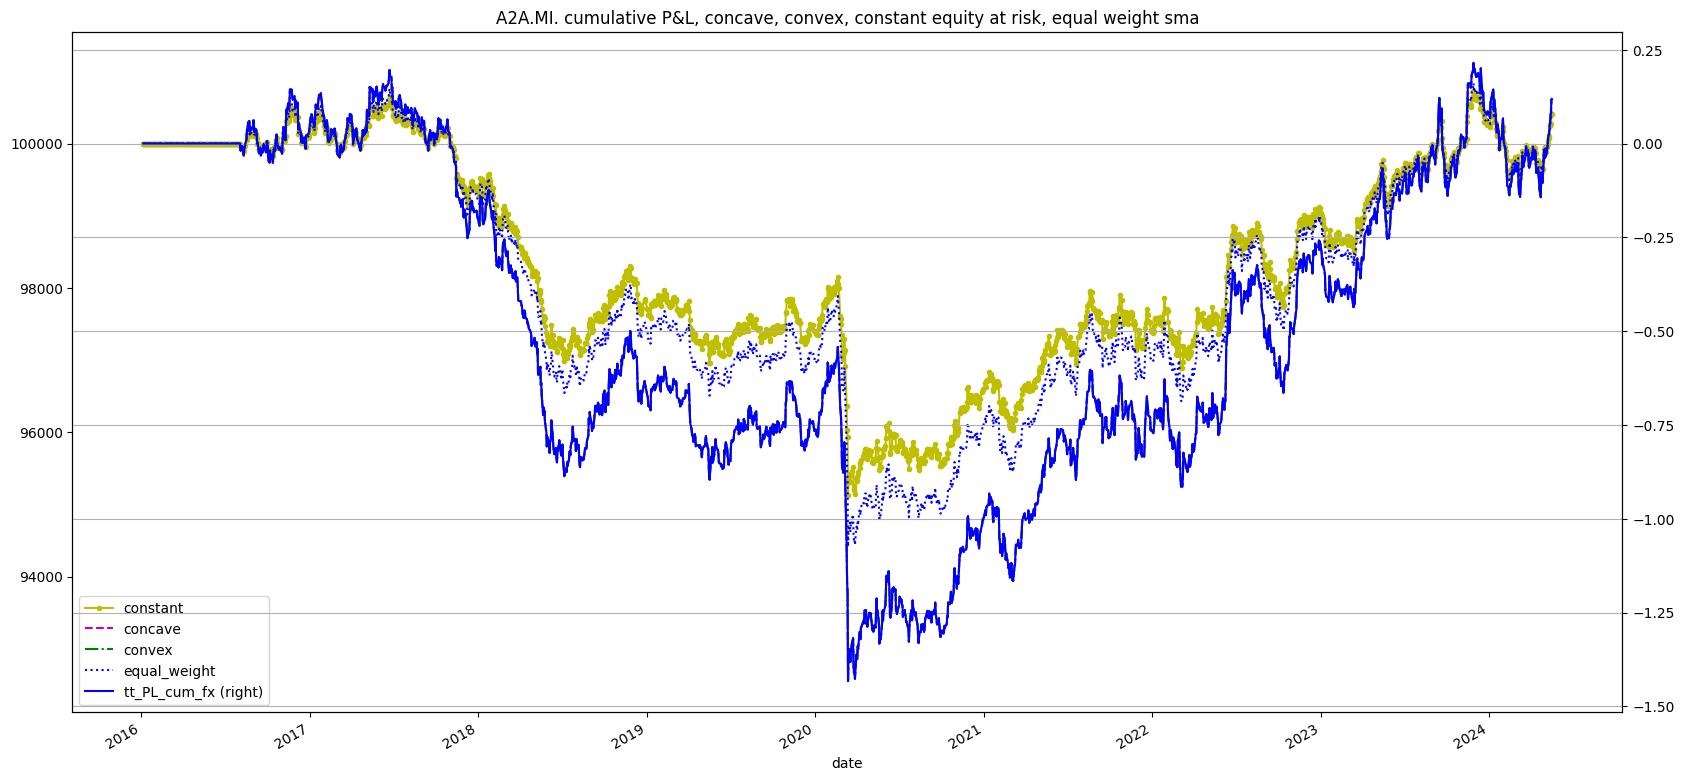

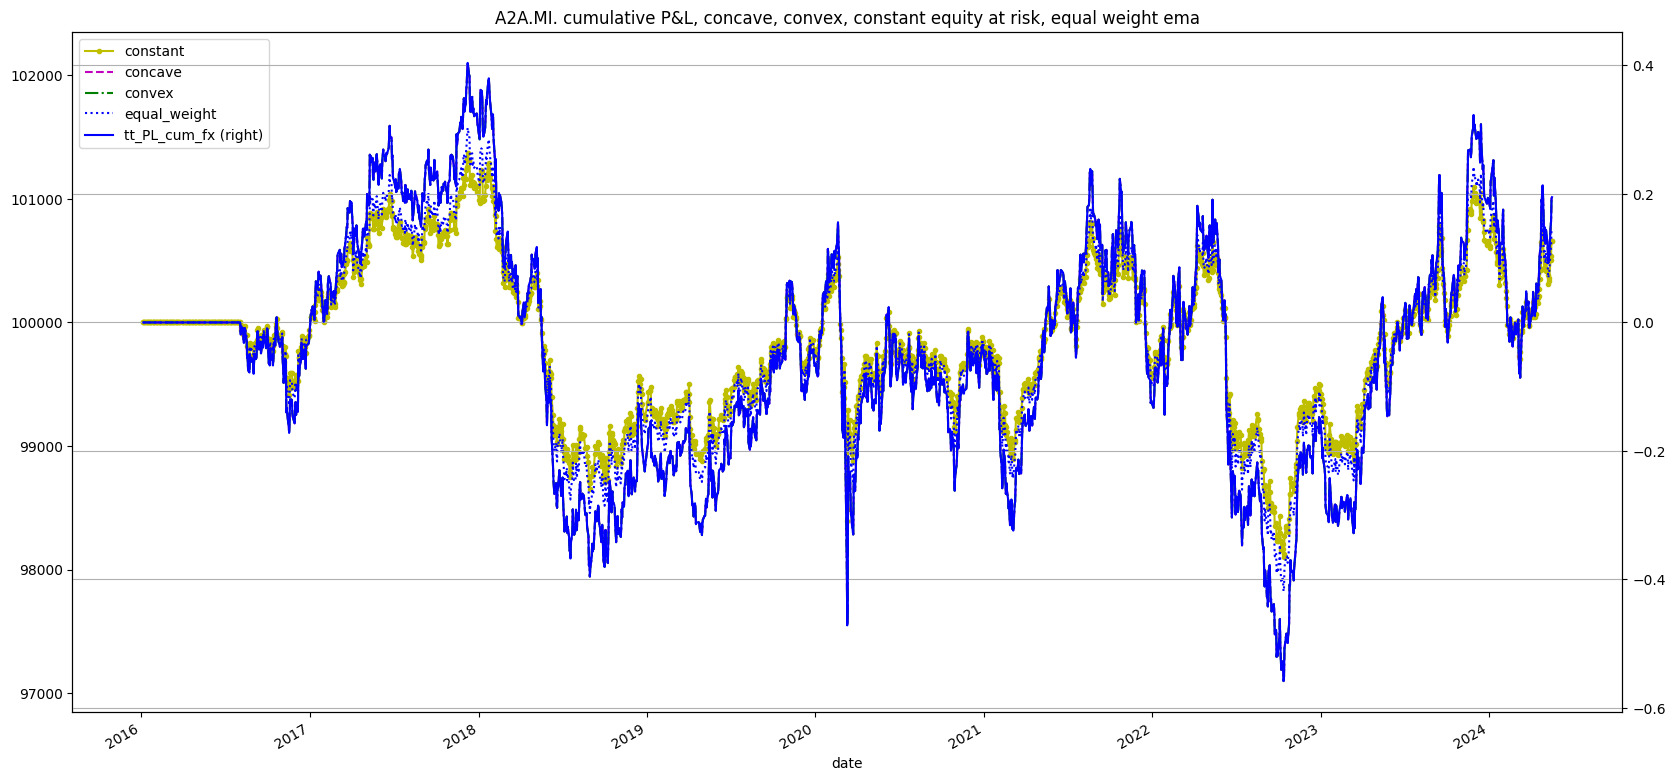

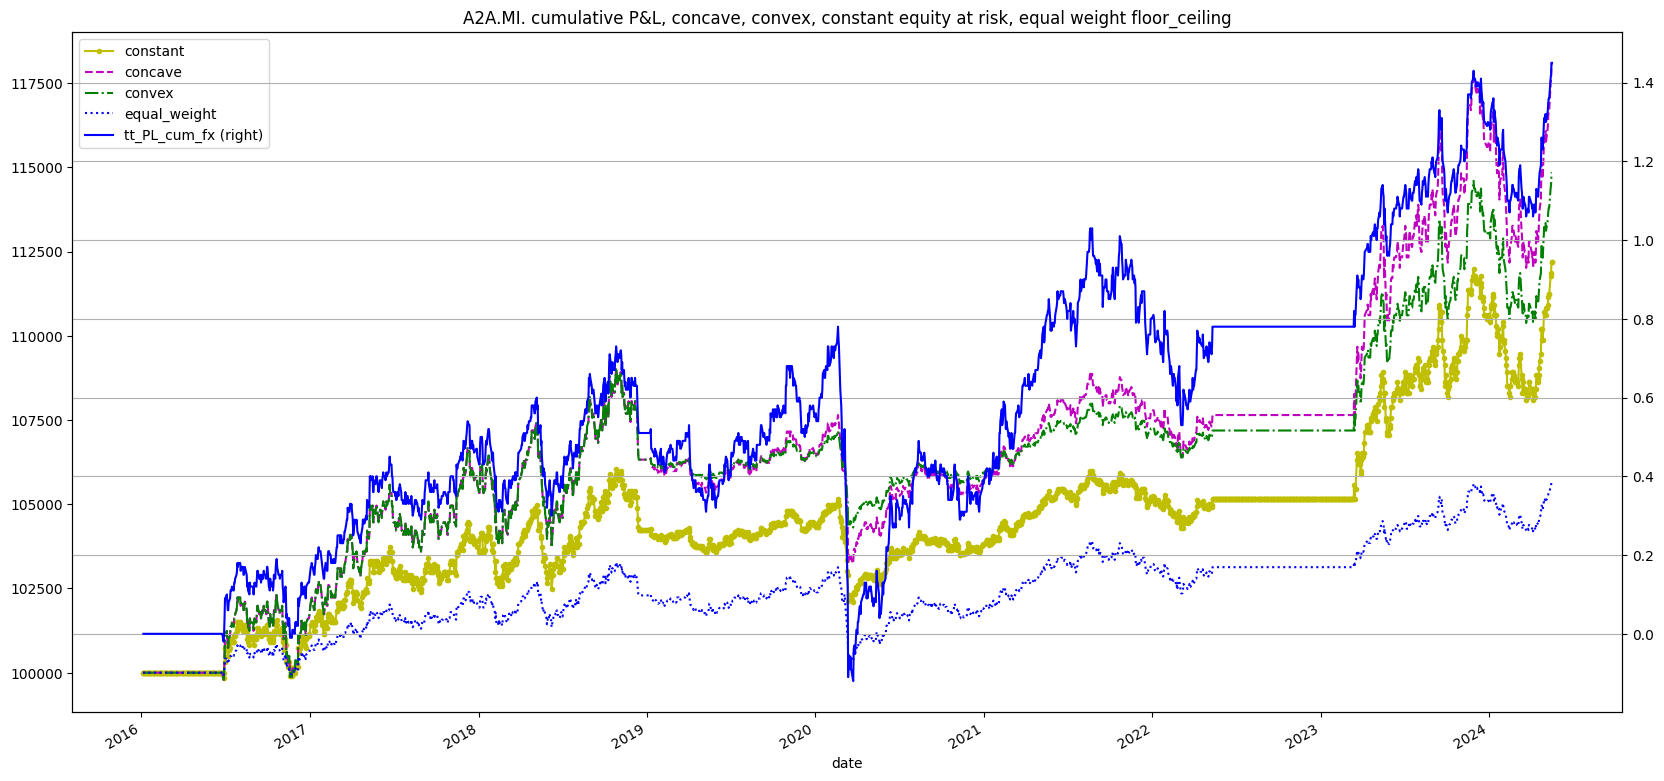

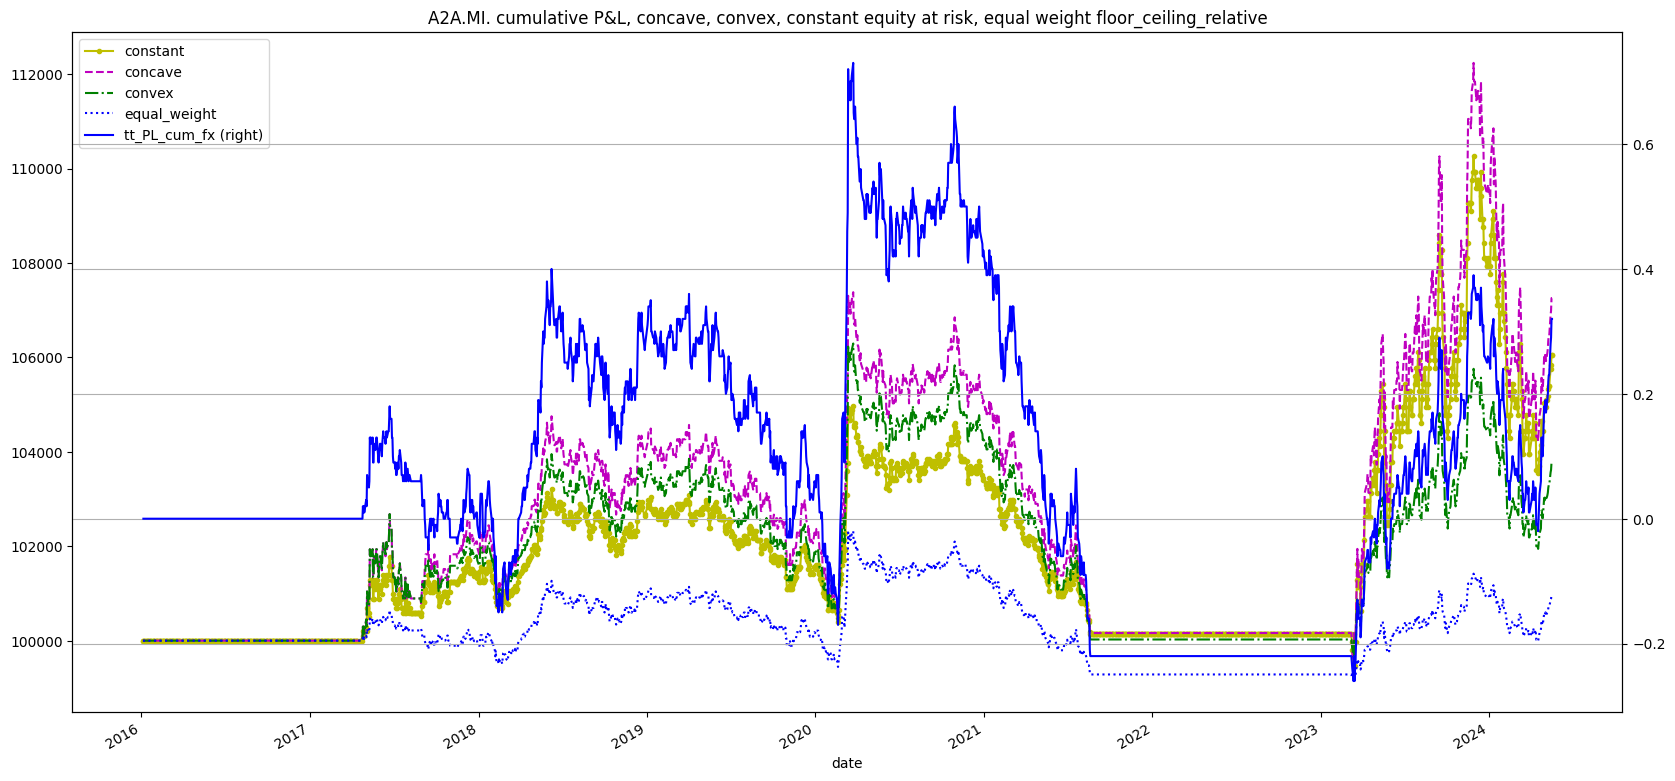

In [23]:
for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    # print(df.tail())
    plot_equity_amount(df, ticker, m)

In [24]:
# # determining the name of the file
# file_name = 'A2A_unt.xlsx'
 
# # saving the excel
# df.to_excel(file_name)

output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'shs_eql','shs_fxd','shs_ccv','shs_cvx']]
output_df_sel.groupby('method').last() 

shs_eql  shs_fxd  shs_ccv  shs_cvx
method                                                    
breakout                -2400.0   7300.0  11000.0  11000.0
ema                     -2500.0   3400.0   5200.0   5200.0
floor_ceiling           -2600.0  10500.0  15600.0  11400.0
floor_ceiling_relative  -2500.0   7400.0   8900.0   5400.0
sma                     -2400.0   3400.0   5200.0   5200.0
turtle                  -2400.0   2300.0   3300.0   1800.0

In [25]:
df_fc.columns

Index(['date', 'volume', 'high', 'low', 'open', 'close', 'adj_close', 'ticker',
       'ropen', 'rhigh', 'rlow', 'rclose', 'hi1', 'lo1', 'hi2', 'lo2', 'hi3',
       'lo3', 'hi4', 'lo4', 'rt', 'rg', 'flr', 'clg', 'rg_ch', 'rh1', 'rl1',
       'rh2', 'rl2', 'rh3', 'rl3', 'rh4', 'rl4', 'rrt', 'rrg', 'rflr', 'rclg',
       'rrg_ch'],
      dtype='object')

In [26]:
df_fc[df_fc['clg'].notna()][['date', 'clg']].tail(1)

date   clg
1431 2021-08-20 07:00:00  1.96

In [27]:

df_fc[df_fc['flr'].notna()][['date', 'flr']].tail(1)

date   flr
1725 2022-10-13 07:00:00  0.94

In [28]:

df_fc[df_fc['hi3'].notna()][['date', 'hi3']].tail(1)

date  hi3
2013 2023-11-28 08:00:00  2.0

In [29]:
df_fc[df_fc['lo3'].notna()][['date', 'lo3']].tail(1)

date   lo3
2093 2024-03-22 08:00:00  1.61

In [30]:

price = 2.021
stop_loss = 1.61
qty = 1000
r_multiplier = 1.1
r_multiplier
pt = target_price(price, stop_loss, r_multiplier)
exit_qty = partial_exit(qty, r_multiplier)
print('target price', pt,'exit_quantity',exit_qty)

target price 2.4730999999999996 exit_quantity 909.090909090909


In [31]:
cost = 1.8945
price = cost * 1.08
qty * (cost - stop_loss) / (price - stop_loss)

652.4331514011832

In [32]:
average_true_range(df_fc,'high','low','close', n= 63)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2125    0.035873
2126    0.036190
2127    0.036984
2128    0.037143
2129    0.036984
Length: 2130, dtype: float64

In [33]:
df_fc.tail()

date    volume  high   low  open  close  adj_close  \
2125 2024-05-10 07:00:00  18455436  1.95  1.92  1.93   1.92       1.92   
2126 2024-05-13 07:00:00  21785909  1.98  1.92  1.93   1.97       1.97   
2127 2024-05-14 07:00:00  27857989  2.02  1.95  1.96   1.98       1.98   
2128 2024-05-15 07:00:00  32469600  2.02  1.97  1.99   2.01       2.01   
2129 2024-05-16 08:43:11   3276923  2.03  2.01  2.01   2.01       2.01   

      ticker  ropen  rhigh  ...  rl2  rh3  rl3  rh4  rl4  rrt  rrg  rflr  \
2125  A2A.MI   1.15   1.16  ...  NaN  NaN  NaN  NaN  NaN  NaN  1.0   NaN   
2126  A2A.MI   1.15   1.18  ...  NaN  NaN  NaN  NaN  NaN  NaN  1.0   NaN   
2127  A2A.MI   1.16   1.19  ...  NaN  NaN  NaN  NaN  NaN  NaN  1.0   NaN   
2128  A2A.MI   1.17   1.18  ...  NaN  NaN  NaN  NaN  NaN  NaN  1.0   NaN   
2129  A2A.MI   1.18   1.19  ...  NaN  NaN  NaN  NaN  NaN  NaN  1.0   NaN   

      rclg  rrg_ch  
2125   NaN    1.01  
2126   NaN    1.01  
2127   NaN    1.01  
2128   NaN    1.01  
2129   NaN    1.01  

[5 rows x 38 columns]

In [ ]:
df_fc['peak_eqty'] =df_fc['close'].cummax()